<u style="font-family: Arial; font-size:2.0em;color:purple;"> Projet : Implèmentation d'un modèle de scoring</u>



# <a id='0'>Sommaire</a>

- <a href='#1'>1.Introduction</a>  
- <a href='#2'>2.Import des données</a>   
- <a href='#3'>3.Architecture des données</a>
- <a href='#4'>4.Analyse exploratoire</a>
    - <a href='#41'>4.1.Répartition des la variable cible "TARGET" selon les deux classes</a>
    - <a href='#42'>4.2.Les clients par genre</a>
    - <a href='#43'>4.3Age des clients</a> 
    - <a href='#44'>4.4.Situation familiale</a>  
    - <a href='#45'>4.5Type de revenus des clients</a>
    - <a href='#46'>4.6.Professions des clients</a>
    - <a href='#47'>4.7.Durée d'emploi</a>
    - <a href='#48'>4.8.Types/Domaines d'activité des entreprises des clients</a>
    - <a href='#49'>4.9.Niveaux d'études</a>
    - <a href='#410'>4.10.Type d'habitat</a>
    - <a href='#411'>4.11.Distribution du revenu total des clients</a>
    - <a href='#412'>4.12.Types de contars de crédits</a>
    - <a href='#413'>4.13.Types des crédits</a>
    - <a href='#414'>4.14.Distribution des montants des crédits</a>
    - <a href='#415'>4.15.Distribution des annuités</a>
    - <a href='#416'>4.16.Durée des crédits</a>
    - <a href='#417'>4.17.Retards de paiements des crédits</a>
    
- <a href='#5'>5.Features engineering</a>
- <a href='#6'>6.Modèlisation</a>
    - <a href='#61'>6.1.Sélection du meilleur modèle</a>
    - <a href='#62'>6.2.Optimisation des hyperparamètres du modèle retenu</a>
    - <a href='#63'>6.3.Evaluation du modèle sélectionné avec traitement des classes déséquilibrées </a>
    - <a href='#64'>6.5.Interprétabilité du modèle</a>
    












# <a id="1">1.Introduction</a>

<u style="font-family: Arial; font-size:1.3em;color:purple;">Contexte : </u>

"Prêt à dépenser" est une société financière qui propose des crédits à la consommation pour des personnes ayant peu ou pas du tout d'historique de prêt.

L'entreprise souhaite développer un outil de “scoring crédit” et un dashbord pour restituer les résultats de cette modélisation. L'objectif est de disposer d'un score (probabilité) qui permettra d'accorder ou pas un crèdit et d'expliquer cette décision au client.


<u style="font-family: Arial; font-size:1.3em;color:purple;">Problèmatique : </u>

Il s'agit d'un problème de classification avec deux classes déséquilibrées. La notion de solvabilité d'un client sera définie selon un seuil de classification. 

Pour une banque, il est important de minimiser le taux de faux positifs afin d'éviter des pertes financières engendrées par l'insolvabilité d'un client.

Afin d'intégrer ces contraintes, l'évaluation des différentes modèlisations sera basée sur les métriques ROC_AUC et F_béta score.

La courbe ROC représente le taux de vrais positifs ( TPR ) par rapport au taux de faux positifs ( FPR ). La métrique ROC_AUC est l'aire sous la courbe ROC, elle est comprise entre 0 et 1. Un modèle de classification, dont les prédictions sont 100% fausses, a une ROC_AUCégale à 0; celui dont les prédictions sont correctes à 100 % a une ROC_AUCégale à 1. 

La ROC_AUC évalue la qualité des prédictions du modèle quel que soit le seuil de classification choisi. Or, la problèmatique traitée intègre deux contraintes, le seuil de classication afin de déterminer la solvabilité d'un client et la minimisation des faux positifs afin de limiter les pertes finacières. C'est pourquoi, la ROC_AUC sera complétée par le  F_béta score dans l'évaluation des modèles.

Le  F_béta score est une métrique qui permet d'accorder plus d'importance (poids) au Recall(rappel) par rapport à la Précicion. 

Pour rappel, le Recall =TP/(TP+FN) et la Précision=TP/(TP+FP). Dans notre problématique, on cherche à maximiser le Recall.

Dans la formule mathèmatique du F_béta score, le paramètre béta permet la pondération entre le Recall et la Précision. La valeur de béta doit être fixée en collaboration avec les équipes métiers. 

En effet, il faudra estimer le coût moyen d'un défaut de paiement (coût de faux positifs) et le coût d'oppotunité d'un client potentiel écarté à tort (faux négatif). On peut ainsi calculer deux coefficients : un coefficient Recall et un coefficient précision. Béta sera égal au rapport entre ces deux coefficients.

Dans le cadre de ce projet, nous n'avons pas de consignes quant aux coûts de défaut et d'opportunité. C'est pourquoi, nous avons développé le travail qui suit sous l'hypothèse : béta=3.

<u style="font-family: Arial; font-size:1.3em;color:purple;">Modèlisation: </u>

Plusieurs classiffiers ont été testé afin d'en sélectionner le meilleur selon les métriques ROC_AUC et F_beta score. Ces modèles sont : RandomForestClassifier, LGBMClassifier, XGBClassifier et la régression logistique. Ils ont été entrainé via une validation croisée avec leurs hyperparamètres définis par défaut. 

L'optimisation des hyperparamètres du modèle choisi a été réalisée via une validation croisée. Enfin, le modèle a été évalué avec ces meilleurs hyperparamètres. 

<u style="font-family: Arial; font-size:1.3em;color:purple;">Traitement des classes déséquilibrées : </u>

Le déséquilibre des classes détériore la qualité de prédiction du modèle puisque à l'étape d'entrainement, l'apprentissage et par conséquent la prédiction se feront au détriment de la classe minoritaire.

Trois méthodes de traitement des classes déséquilibrées ont été testées : SMOTE, SMOTE&RandomUnderSampler et ADASYN. L'évaluation de ces mèthodes, combinées au meilleur modèle, a été réalisée sur la base des métriques ROC AUC et F_beta score. 

La méthode SMOTE ( Synthetic Minority Oversampling Technique) consiste à générer, selon un taux d'échantillonage, des données synthétiques très proches (très similaires) des données de la classes minoritaire.

La méthode RandomUnderSampler vise à réduire les données de la classe majoritaire en supprimant des observations de cette classe.

La combinaison des méthodes SMOTE et RandomUnderSampler peut s'avérer efficace pour traiter le déséquilibre des classes. 

Enfin, la méthode ADASYN (Adaptive Synthetic Sampling), selon cette article :https://ieeexplore.ieee.org/document/4633969, consiste à générer des données synthètiques de la classes minoritaire de manière "adaptative" en fonction de leurs distributions. 

"This paper presents a novel adaptive synthetic (ADASYN) sampling approach for learning from imbalanced data sets. The essential idea of ADASYN is to use a weighted distribution for different minority class examples according to their level of difficulty in learning, where more synthetic data is generated for minority class examples that are harder to learn compared to those minority examples that are easier to learn. As a result, the ADASYN approach improves learning with respect to the data distributions in two ways: (1) reducing the bias introduced by the class imbalance, and (2) adaptively shifting the classification decision boundary toward the difficult examples. Simulation analyses on several machine learning data sets show the effectiveness of this method across five evaluation metrics."

<u style="font-family: Arial; font-size:1.3em;color:purple;">Interprétabilité : </u>

La méthode Shap (SHapley Additive exPlanations) a été utilisée afin de connaître, globalement, les variables les plus influentes sur les prédictions du modèle. De la même manière, Shap permet d'identifier,localement, les variables influant la prédiction pour une observation donnée.


In [2]:
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, roc_auc_score,f1_score,fbeta_score,precision_score,recall_score
from imblearn.under_sampling import RandomUnderSampler
#from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.compose import make_column_transformer,make_column_selector,TransformedTargetRegressor,ColumnTransformer
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
import scipy.stats as stats
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV,KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import average_precision_score, log_loss
from sklearn.metrics import make_scorer

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
import shap



# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

import pickle
import joblib



# <a id="2">2.Import des données</a>

In [39]:
application_train = pd.read_csv("application_train.csv")
application_test = pd.read_csv("application_test.csv")
bureau = pd.read_csv("bureau.csv")
bureau_balance = pd.read_csv("bureau_balance.csv")
credit_card_balance = pd.read_csv("credit_card_balance.csv")
installments_payments = pd.read_csv("installments_payments.csv")
previous_application = pd.read_csv("previous_application.csv")
POS_CASH_balance = pd.read_csv("POS_CASH_balance.csv")

## <a id="3">Architecture des données</a>



<img src="https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png" width="800"></img>


In [40]:
print("Dimensions")

dict_df = {'application_train shape :': application_train.shape, 
           'application_test shape :' : application_test.shape, 
           'bureau shape :' : bureau.shape,
           'bureau_balance shape :' : bureau_balance.shape,
           'POS_CASH_balance shape :' : POS_CASH_balance.shape, 
           'credit_card_balance shape :' : credit_card_balance.shape, 
           'installments_payments shape :' : installments_payments.shape, 
           'previous_application shape:' : previous_application.shape}

for key, value in dict_df.items():
    print(f'{key :-<30} {value}')

Dimensions
application_train shape :----- (307511, 122)
application_test shape :------ (48744, 121)
bureau shape :---------------- (1716428, 17)
bureau_balance shape :-------- (27299925, 3)
POS_CASH_balance shape :------ (10001358, 8)
credit_card_balance shape :--- (3840312, 23)
installments_payments shape :- (13605401, 8)
previous_application shape:--- (1670214, 37)


In [41]:
bdd=[application_train,application_test,bureau,bureau_balance,POS_CASH_balance,credit_card_balance,installments_payments,previous_application]
label_bdd=['application_train','application_test','bureau','bureau_balance','POS_CASH_balance','credit_card_balance','installments_payments','previous_application']

In [42]:
for table,name in zip(bdd,label_bdd):
    print('Variables table :',name)
    print('')
    table.info()
    print('')
    print('-'*100)

Variables table : application_train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB

----------------------------------------------------------------------------------------------------
Variables table : application_test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB

----------------------------------------------------------------------------------------------------
Variables table : bureau

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE     

In [42]:
for table,name in zip(bdd,label_bdd):
    print('Variables table :',name)
    print('')
    table.info()
    print('')
    print('-'*100)

Variables table : application_train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB

----------------------------------------------------------------------------------------------------
Variables table : application_test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB

----------------------------------------------------------------------------------------------------
Variables table : bureau

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE     



## <a id="33">Les valeurs manquantes</a>

In [43]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [44]:
for table,name in zip(bdd,label_bdd):
    print('Distribution des valeurs manquantes(en%) des colonnes de la table :',name)
    print('')
    print(missing_data(table)['Percent'].describe())
    print('')
    print('-'*100)

Distribution des valeurs manquantes(en%) des colonnes de la table : application_train

count    122.000000
mean      24.395942
std       28.446507
min        0.000000
25%        0.000000
50%        0.332021
75%       50.818020
max       69.872297
Name: Percent, dtype: float64

----------------------------------------------------------------------------------------------------
Distribution des valeurs manquantes(en%) des colonnes de la table : application_test

count    121.000000
mean      23.811687
std       27.722367
min        0.000000
25%        0.000000
50%        0.059495
75%       49.005006
max       68.716150
Name: Percent, dtype: float64

----------------------------------------------------------------------------------------------------
Distribution des valeurs manquantes(en%) des colonnes de la table : bureau

count    17.000000
mean     13.502552
std      23.869116
min       0.000000
25%       0.000000
50%       0.000000
75%      15.011932
max      71.473490
Name: Percent, 



# <a id="4">Analyse exploratoire</a>




## <a id="41">Répartition de la variable cible "TARGET" selon les deux classes</a>

**TARGET** valeur 0 lorsque le crédit est remboursé, valeur 1 lorsque le crédit est non remboursé.

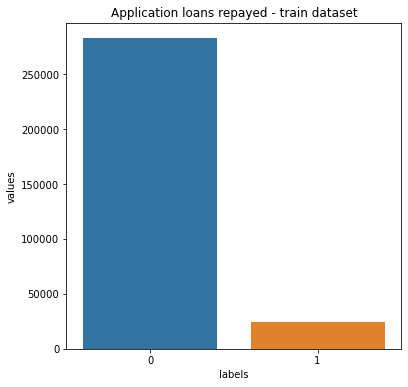

In [45]:
temp = application_train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('Application loans repayed - train dataset')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()


## <a id="42">Les clients par genre</a>


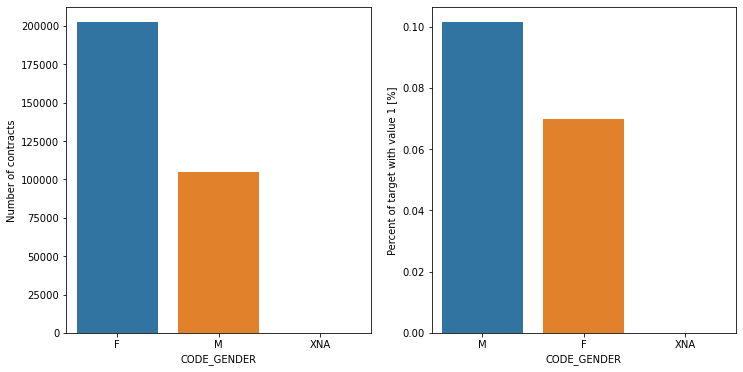

In [49]:
plot_stats('CODE_GENDER')

Les clients sont majoritairement des femmes. En revanche, les impayés sont plus important chez les hommes.

## <a id="43">Age des clients</a>



C:\Users\home-pc\OneDrive\Documents\DS PYTHON\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


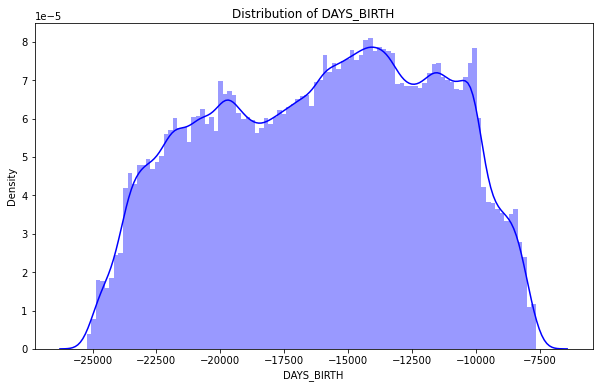

In [65]:
plot_distribution('DAYS_BIRTH','blue')

L'âge des clients observés varie entre 20 et 69 ans.

## <a id="44">Situation familiale des clients</a>

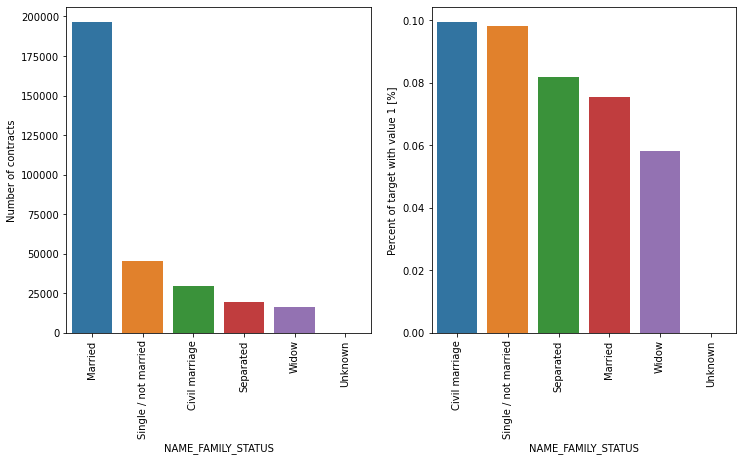

In [51]:
plot_stats('NAME_FAMILY_STATUS',True, True)

Les clients mariés sont plus nombreux comparé aux autres stauts matrimoniaux, ils sont également plus nombreux à être en défaut de paiement.

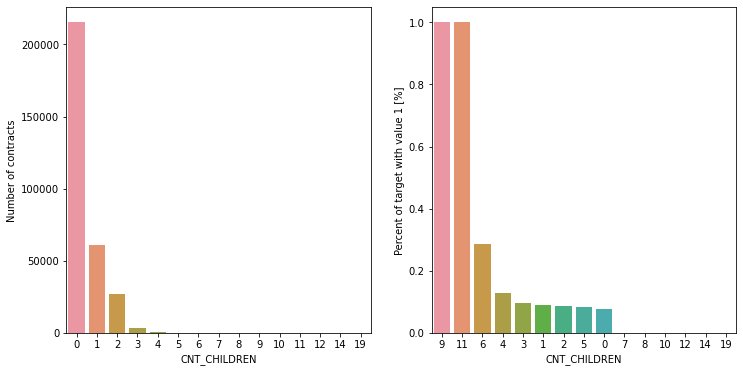

In [52]:
plot_stats('CNT_CHILDREN')

Most of the clients taking a loan have no children. The number of loans associated with the clients with one children are 4 times smaller, the number of loans associated with the clients with two children are 8 times smaller; clients with 3, 4 or more children are much more rare. 

As for repayment, clients with no children, 1, 2, 3, and 5 children have percents of no repayment around the average (10%). The clients with 4 and 6 children are above average in terms of percent of not paid back loans (over 25% for families with 6 children).

As for clients with 9 or 11 children, the percent of loans not repaid is 100%.



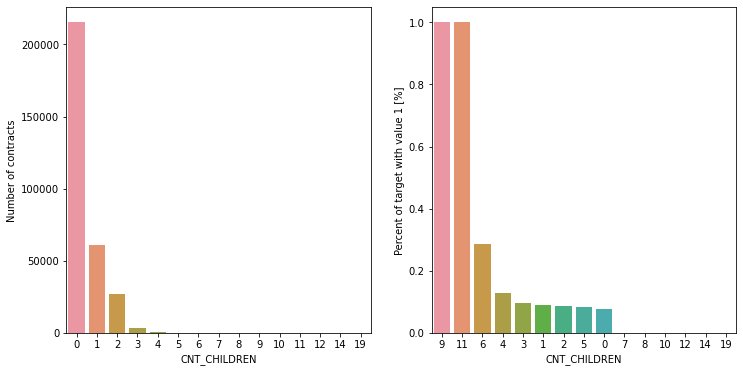

In [52]:
plot_stats('CNT_CHILDREN')

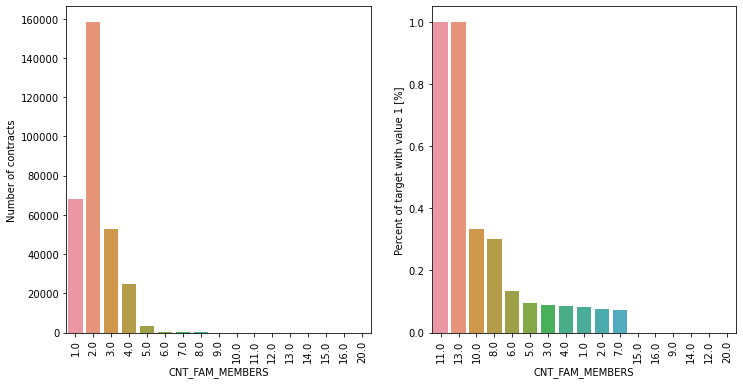

In [53]:
plot_stats('CNT_FAM_MEMBERS',True)

## <a id="45">Types de revenus des clients</a>


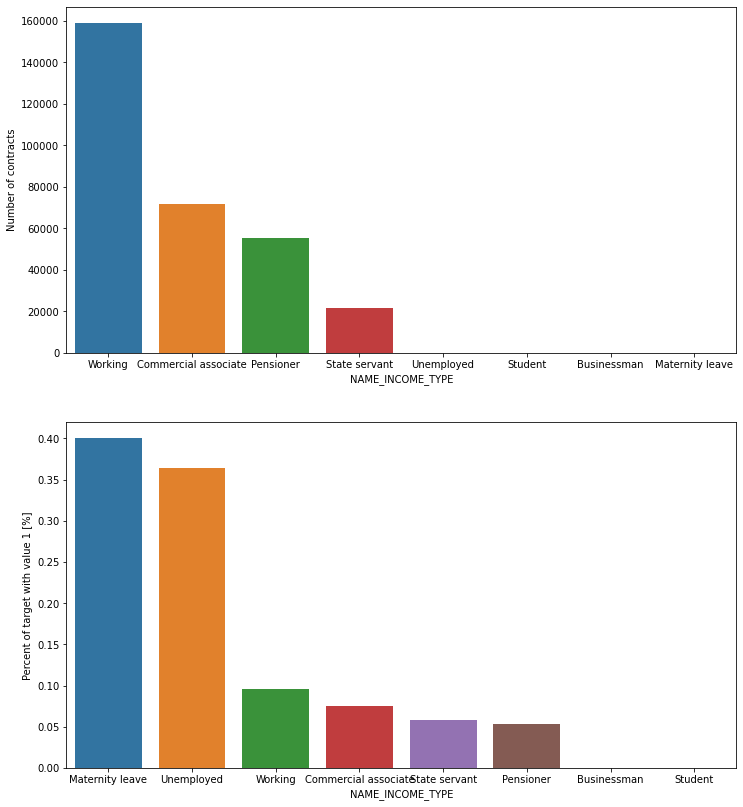

In [54]:
plot_stats('NAME_INCOME_TYPE',False,False)

Le travail est la source de revenu majoritaire chez les clients. Quant aux impayés, ils sont plus nombreux chez les méres au foyer et les chomeurs.

## <a id="46">Profession des clients</a>



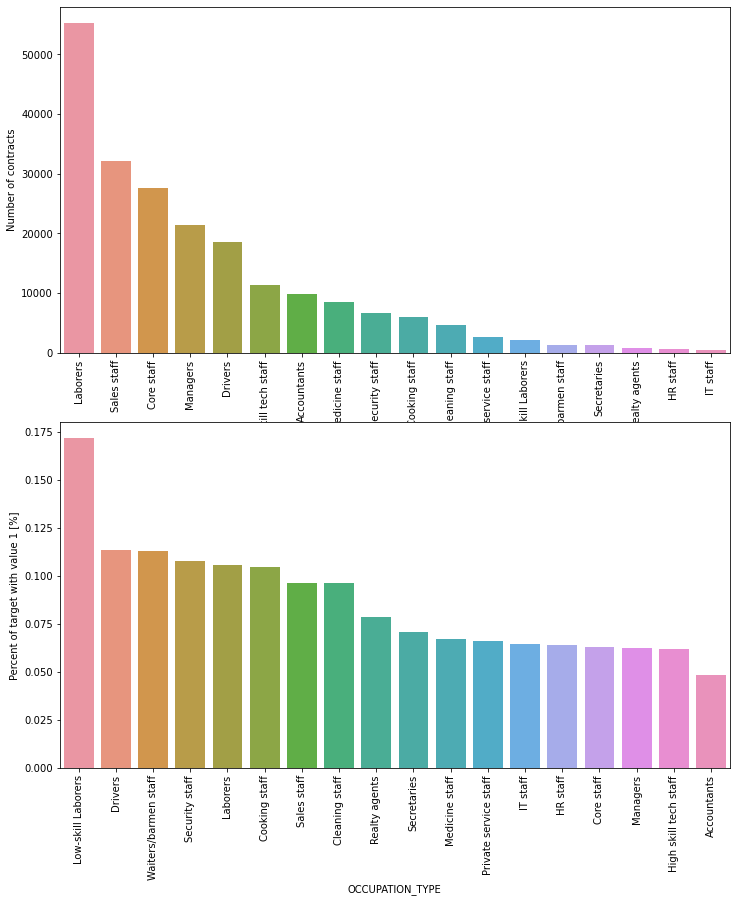

In [55]:
plot_stats('OCCUPATION_TYPE',True, False)

Les clients ont majoritairement des métiers dans l'agriculture et le commerce. Les impayés sont majoritairement observés chez les clients ayant un métier peu qualifiés dans l'agriculture. 

## <a id="47">Durée d'emploi des clients</a>



C:\Users\home-pc\OneDrive\Documents\DS PYTHON\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


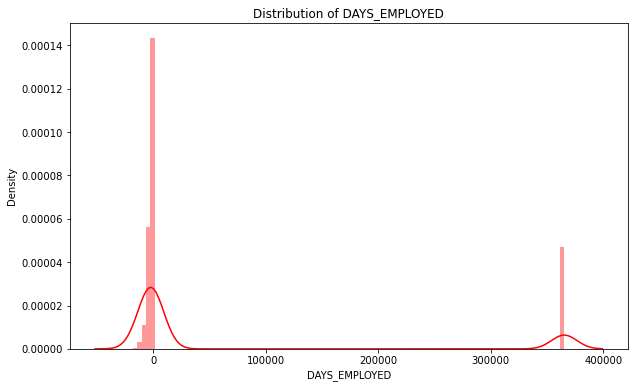

In [66]:
plot_distribution('DAYS_EMPLOYED','red')

## <a id="48">Type/domaine d'entreprise des clients</a>

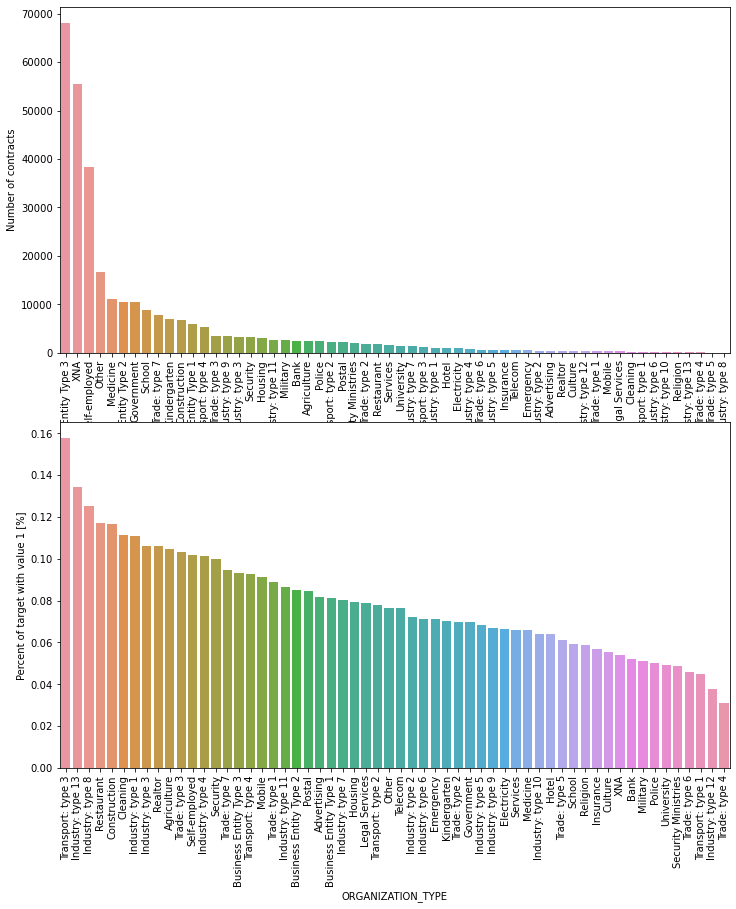

In [56]:
plot_stats('ORGANIZATION_TYPE',True, False)

Les clients travaillant dans le domaine du transport enregistrent le taux d'impayé le plus important comparé aux autres domaines d'activité.

## <a id="49">Niveau d'éducation des clients</a>

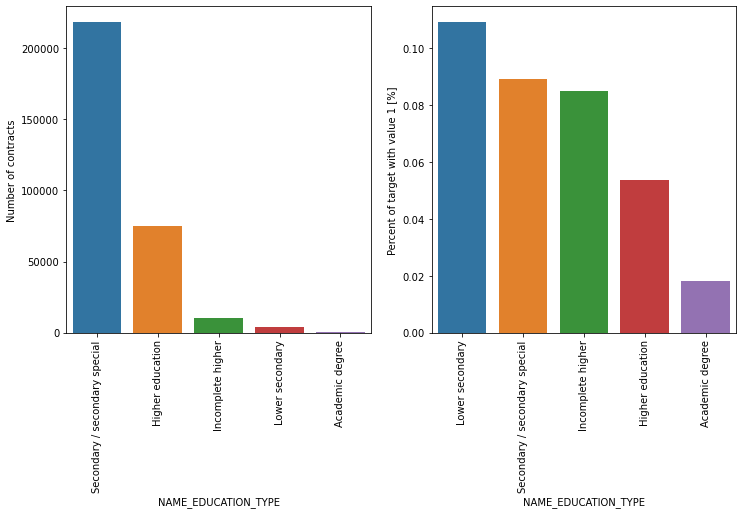

In [57]:
plot_stats('NAME_EDUCATION_TYPE',True)

La majorité des clients possède un niveau d'études Secondaire/Secondaire avec spécialité.



## <a id="410">Type d'habitat des clients</a>

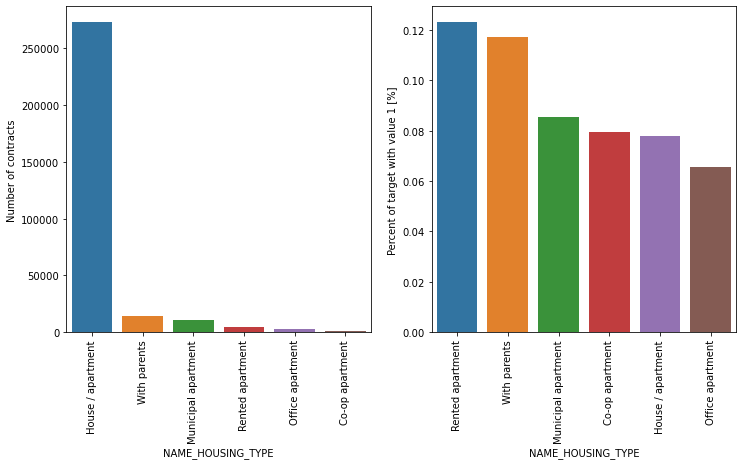

In [58]:
plot_stats('NAME_HOUSING_TYPE',True)

La plus part des clients vivent en appartement ou en maison. Les locataires des maisons sont plus nombreux à être en défaut de paiement, même constat pour les clients vivants avec leurs parents.



## <a id="41">Distribution du revenu total des clients</a>



In [59]:
# Plot distribution of one feature
def plot_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(application_train[feature].dropna(),color=color, kde=True,bins=100)
    plt.show()   

In [60]:
# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_distribution_comp(var,nrow=2):
    
    i = 0
    t1 = application_train.loc[application_train['TARGET'] != 0]
    t0 = application_train.loc[application_train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

C:\Users\home-pc\OneDrive\Documents\DS PYTHON\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


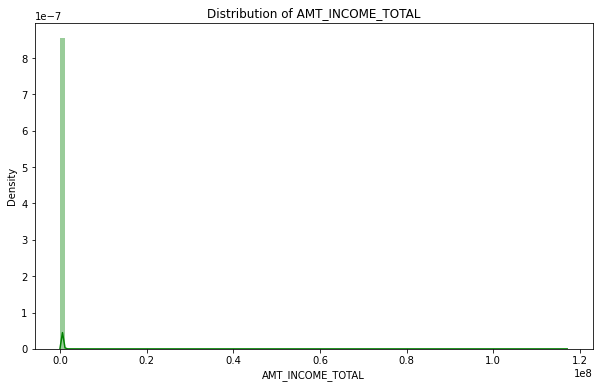

In [61]:
plot_distribution('AMT_INCOME_TOTAL','green')




## <a id="412">Types de contrats de crédit</a>



In [46]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = application_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = application_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

In [47]:
def plot_distribution(var):
    
    i = 0
    t1 = application_train.loc[application_train['TARGET'] != 0]
    t0 = application_train.loc[application_train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(2,2,figsize=(12,12))

    for feature in var:
        i += 1
        plt.subplot(2,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

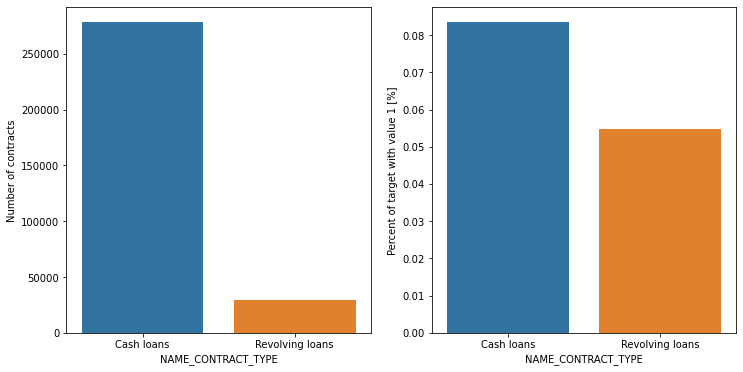

In [48]:
plot_stats('NAME_CONTRACT_TYPE')

## <a id="413">Types de crédits</a>



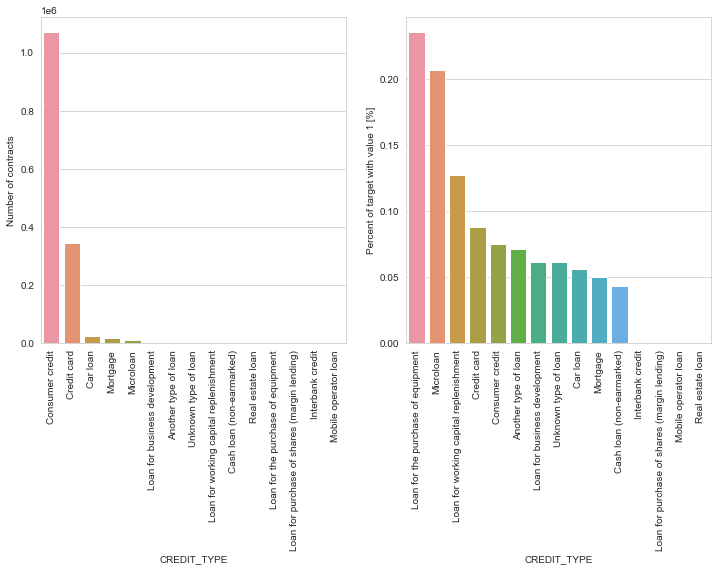

In [77]:
plot_b_stats('CREDIT_TYPE', True, True)

Les emprunts accordés sont majoritairement des crédits à la consommation. Les impayés sont plus fréquents lorsqu'il s'agit de crédits destinés à l'achat d'équipements ou de micro-crédits.




## <a id="414">Distribution des montants des crédits</a>


C:\Users\home-pc\OneDrive\Documents\DS PYTHON\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


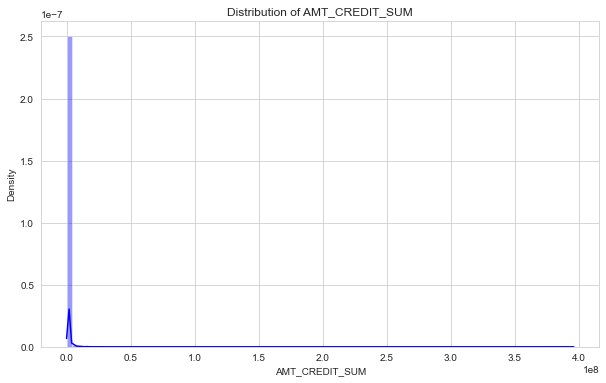

In [80]:
plot_b_distribution('AMT_CREDIT_SUM','blue')

C:\Users\home-pc\AppData\Local\Temp/ipykernel_2972/3292444167.py:26: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  points = points[:,None]
C:\Users\home-pc\OneDrive\Documents\DS PYTHON\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


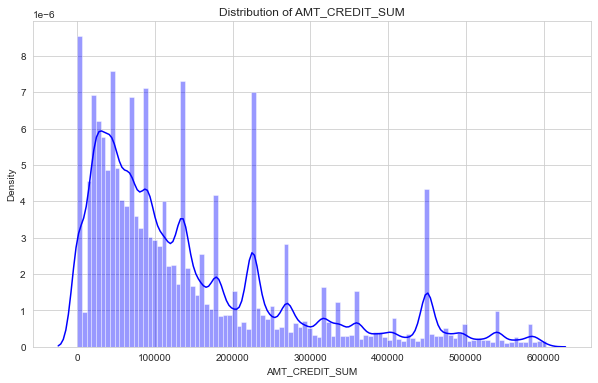

In [81]:
# Source: https://stackoverflow.com/questions/11882393/matplotlib-disregard-outliers-when-plotting (see references)

def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

def plot_b_o_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    x = application_bureau_train[feature].dropna()
    filtered = x[~is_outlier(x)]
    sns.distplot(filtered,color=color, kde=True,bins=100)
    plt.show() 

plot_b_o_distribution('AMT_CREDIT_SUM','blue')

## <a id="415">Distribution des annuités>/a>



C:\Users\home-pc\OneDrive\Documents\DS PYTHON\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


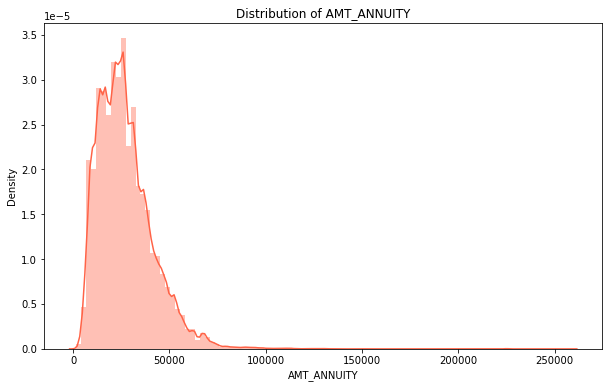

In [63]:
plot_distribution('AMT_ANNUITY','tomato')

## <a id="416">Durée des crédits</a>



C:\Users\home-pc\OneDrive\Documents\DS PYTHON\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


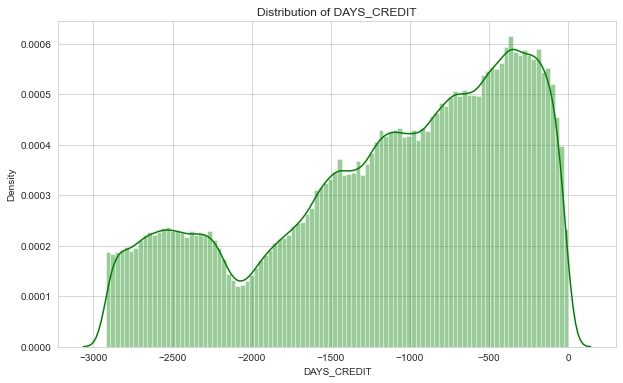

In [78]:
def plot_b_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(application_bureau_train[feature].dropna(),color=color, kde=True,bins=100)
    plt.show() 
    
plot_b_distribution('DAYS_CREDIT','green')

La durée des crédits accordés varie entre quelques mois et 8 ans.

## <a id="417">Crédits et retard de paiements</a>



C:\Users\home-pc\OneDrive\Documents\DS PYTHON\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


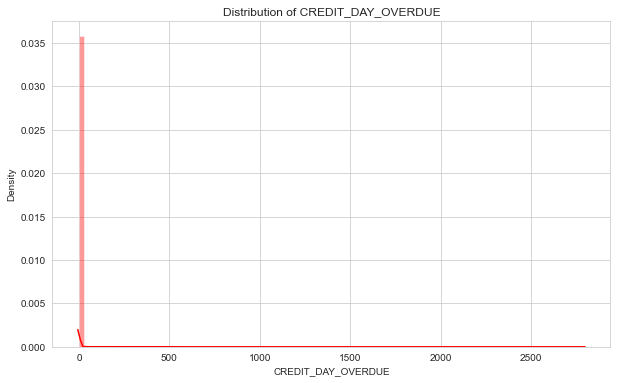

In [79]:
plot_b_distribution('CREDIT_DAY_OVERDUE','red')

## <a id="5">5.Features engineering</a>

Cette partie sera consacrée aux opérations de features engineering suivantes :

- Aggrégation de variables
- Traitement des valeurs manquantes
- Corrélations linéaires avec la variable cible
- Suppression des variables colinéaires

### Calcul des variables agrégées

In [15]:
def agg_numeric(df, group_var, df_name):
    """Aggregates the numeric values in a dataframe. This can
    be used to create features for each instance of the grouping variable.
    
    Parameters
    --------
        df (dataframe): 
            the dataframe to calculate the statistics on
        group_var (string): 
            the variable by which to group df
        df_name (string): 
            the variable used to rename the columns
        
    Return
    --------
        agg (dataframe): 
            a dataframe with the statistics aggregated for 
            all numeric columns. Each instance of the grouping variable will have 
            the statistics (mean, min, max, sum; currently supported) calculated. 
            The columns are also renamed to keep track of features created.
    
    """
    # Remove id variables other than grouping variable
    for col in df:
        if col != group_var and 'SK_ID' in col:
            df = df.drop(columns = col)
            
    group_ids = df[group_var]
    numeric_df = df.select_dtypes('number')
    numeric_df[group_var] = group_ids

    # Group by the specified variable and calculate the statistics
    agg = numeric_df.groupby(group_var).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()

    # Need to create new column names
    columns = [group_var]

    # Iterate through the variables names
    for var in agg.columns.levels[0]:
        # Skip the grouping variable
        if var != group_var:
            # Iterate through the stat names
            for stat in agg.columns.levels[1][:-1]:
                # Make a new column name for the variable and stat
                columns.append('%s_%s_%s' % (df_name, var, stat))

    agg.columns = columns
    return agg

In [68]:
def agg_categorical(df, parent_var, df_name):
    """
    Aggregates the categorical features in a child dataframe
    for each observation of the parent variable.
    
    Parameters
    --------
    df : dataframe 
        The dataframe to calculate the value counts for.
        
    parent_var : string
        The variable by which to group and aggregate the dataframe. For each unique
        value of this variable, the final dataframe will have one row
        
    df_name : string
        Variable added to the front of column names to keep track of columns

    
    Return
    --------
    categorical : dataframe
        A dataframe with aggregated statistics for each observation of the parent_var
        The columns are also renamed and columns with duplicate values are removed.
        
    """
    
    # Select the categorical columns
    categorical = pd.get_dummies(df.select_dtypes('category'))

    # Make sure to put the identifying id on the column
    categorical[parent_var] = df[parent_var]

    # Groupby the group var and calculate the sum and mean
    categorical = categorical.groupby(parent_var).agg(['sum', 'count', 'mean'])
    
    column_names = []
    
    # Iterate through the columns in level 0
    for var in categorical.columns.levels[0]:
        # Iterate through the stats in level 1
        for stat in ['sum', 'count', 'mean']:
            # Make a new column name
            column_names.append('%s_%s_%s' % (df_name, var, stat))
    
    categorical.columns = column_names
    
    # Remove duplicate columns by values
    _, idx = np.unique(categorical, axis = 1, return_index = True)
    categorical = categorical.iloc[:, idx]
    
    return categorical

In [35]:
# Read in new copies of all the dataframes
train = pd.read_csv('application_train.csv')
bureau = pd.read_csv('bureau.csv')
bureau_balance = pd.read_csv('bureau_balance.csv')

In [36]:
bureau_counts = count_categorical(bureau, group_var = 'SK_ID_CURR', df_name = 'bureau')
bureau_counts.head()

,bureau_CREDIT_ACTIVE_Active_count,bureau_CREDIT_ACTIVE_Active_count_norm,bureau_CREDIT_ACTIVE_Bad debt_count,bureau_CREDIT_ACTIVE_Bad debt_count_norm,bureau_CREDIT_ACTIVE_Closed_count,bureau_CREDIT_ACTIVE_Closed_count_norm,bureau_CREDIT_ACTIVE_Sold_count,bureau_CREDIT_ACTIVE_Sold_count_norm,bureau_CREDIT_CURRENCY_currency 1_count,bureau_CREDIT_CURRENCY_currency 1_count_norm,...,bureau_CREDIT_TYPE_Microloan_count,bureau_CREDIT_TYPE_Microloan_count_norm,bureau_CREDIT_TYPE_Mobile operator loan_count,bureau_CREDIT_TYPE_Mobile operator loan_count_norm,bureau_CREDIT_TYPE_Mortgage_count,bureau_CREDIT_TYPE_Mortgage_count_norm,bureau_CREDIT_TYPE_Real estate loan_count,bureau_CREDIT_TYPE_Real estate loan_count_norm,bureau_CREDIT_TYPE_Unknown type of loan_count,bureau_CREDIT_TYPE_Unknown type of loan_count_norm
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,3,0.428571,0,0.0,4,0.571429,0,0.0,7,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100002,2,0.250000,0,0.0,6,0.750000,0,0.0,8,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100003,1,0.250000,0,0.0,3,0.750000,0,0.0,4,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100004,0,0.000000,0,0.0,2,1.000000,0,0.0,2,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100005,2,0.666667,0,0.0,1,0.333333,0,0.0,3,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0


In [37]:
bureau_agg = agg_numeric(bureau.drop(columns = ['SK_ID_BUREAU']), group_var = 'SK_ID_CURR', df_name = 'bureau')
bureau_agg.head()

,SK_ID_CURR,bureau_DAYS_CREDIT_count,bureau_DAYS_CREDIT_mean,bureau_DAYS_CREDIT_max,bureau_DAYS_CREDIT_min,bureau_DAYS_CREDIT_sum,bureau_CREDIT_DAY_OVERDUE_count,bureau_CREDIT_DAY_OVERDUE_mean,bureau_CREDIT_DAY_OVERDUE_max,bureau_CREDIT_DAY_OVERDUE_min,...,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_sum
0,100001,7,-735.000000,-49,-1572,-5145,7,0.0,0,0,...,7,-93.142857,-6,-155,-652,7,3545.357143,10822.5,0.0,24817.5
1,100002,8,-874.000000,-103,-1437,-6992,8,0.0,0,0,...,8,-499.875000,-7,-1185,-3999,7,0.000000,0.0,0.0,0.0
2,100003,4,-1400.750000,-606,-2586,-5603,4,0.0,0,0,...,4,-816.000000,-43,-2131,-3264,0,NaN,NaN,NaN,0.0
3,100004,2,-867.000000,-408,-1326,-1734,2,0.0,0,0,...,2,-532.000000,-382,-682,-1064,0,NaN,NaN,NaN,0.0
4,100005,3,-190.666667,-62,-373,-572,3,0.0,0,0,...,3,-54.333333,-11,-121,-163,3,1420.500000,4261.5,0.0,4261.5


In [38]:
#Value counts of Bureau Balance dataframe by loan
bureau_balance_counts = count_categorical(bureau_balance, group_var = 'SK_ID_BUREAU', df_name = 'bureau_balance')
bureau_balance_counts.head()

,bureau_balance_STATUS_0_count,bureau_balance_STATUS_0_count_norm,bureau_balance_STATUS_1_count,bureau_balance_STATUS_1_count_norm,bureau_balance_STATUS_2_count,bureau_balance_STATUS_2_count_norm,bureau_balance_STATUS_3_count,bureau_balance_STATUS_3_count_norm,bureau_balance_STATUS_4_count,bureau_balance_STATUS_4_count_norm,bureau_balance_STATUS_5_count,bureau_balance_STATUS_5_count_norm,bureau_balance_STATUS_C_count,bureau_balance_STATUS_C_count_norm,bureau_balance_STATUS_X_count,bureau_balance_STATUS_X_count_norm
SK_ID_BUREAU,,,,,,,,,,,,,,,,
5001709,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,86,0.886598,11,0.113402
5001710,5,0.060241,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,48,0.578313,30,0.361446
5001711,3,0.750000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,1,0.250000
5001712,10,0.526316,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,9,0.473684,0,0.000000
5001713,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,22,1.000000


In [39]:
#Aggregated stats of Bureau Balance dataframe by loan
bureau_balance_agg = agg_numeric(bureau_balance, group_var = 'SK_ID_BUREAU', df_name = 'bureau_balance')
bureau_balance_agg.head()

,SK_ID_BUREAU,bureau_balance_MONTHS_BALANCE_count,bureau_balance_MONTHS_BALANCE_mean,bureau_balance_MONTHS_BALANCE_max,bureau_balance_MONTHS_BALANCE_min,bureau_balance_MONTHS_BALANCE_sum
0,5001709,97,-48.0,0,-96,-4656
1,5001710,83,-41.0,0,-82,-3403
2,5001711,4,-1.5,0,-3,-6
3,5001712,19,-9.0,0,-18,-171
4,5001713,22,-10.5,0,-21,-231


In [40]:
# Dataframe grouped by the loan
bureau_by_loan = bureau_balance_agg.merge(bureau_balance_counts, right_index = True, left_on = 'SK_ID_BUREAU', how = 'outer')

# Merge to include the SK_ID_CURR
bureau_by_loan = bureau[['SK_ID_BUREAU', 'SK_ID_CURR']].merge(bureau_by_loan, on = 'SK_ID_BUREAU', how = 'left')

# Aggregate the stats for each client
bureau_balance_by_client = agg_numeric(bureau_by_loan.drop(columns = ['SK_ID_BUREAU']), group_var = 'SK_ID_CURR', df_name = 'client')

### Ajout des variables aggrégées à la table "train"

In [41]:
original_features = list(train.columns)
print('Original Number of Features: ', len(original_features))

Original Number of Features:  122


In [42]:
# Merge with the value counts of bureau
train = train.merge(bureau_counts, on = 'SK_ID_CURR', how = 'left')

# Merge with the stats of bureau
train = train.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')

# Merge with the monthly information grouped by client
train = train.merge(bureau_balance_by_client, on = 'SK_ID_CURR', how = 'left')

In [43]:
new_features = list(train.columns)
print('Number of features using previous loans from other institutions data: ', len(new_features))

Number of features using previous loans from other institutions data:  333


### Traitement des valeurs manquantes



In [44]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [45]:
missing_train = missing_values_table(train)
missing_train.head(10)

Your selected dataframe has 333 columns.
There are 278 columns that have missing values.


,Missing Values,% of Total Values
bureau_AMT_ANNUITY_min,227502,74.0
bureau_AMT_ANNUITY_max,227502,74.0
bureau_AMT_ANNUITY_mean,227502,74.0
client_bureau_balance_STATUS_4_count_min,215280,70.0
client_bureau_balance_STATUS_3_count_norm_mean,215280,70.0
client_bureau_balance_MONTHS_BALANCE_count_min,215280,70.0
client_bureau_balance_STATUS_4_count_max,215280,70.0
client_bureau_balance_STATUS_4_count_mean,215280,70.0
client_bureau_balance_STATUS_3_count_norm_min,215280,70.0
client_bureau_balance_STATUS_3_count_norm_max,215280,70.0


Après rapprochement avec les données de la table "test", les varaibles ayant plus de 90%  de valeurs manquantes seront supprimées.

In [46]:
missing_train_vars = list(missing_train.index[missing_train['% of Total Values'] > 90])
len(missing_train_vars)

0

In [47]:
# Read in the test dataframe
test = pd.read_csv('application_test.csv')

# Merge with the value counts of bureau
test = test.merge(bureau_counts, on = 'SK_ID_CURR', how = 'left')

# Merge with the stats of bureau
test = test.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')

# Merge with the value counts of bureau balance
test = test.merge(bureau_balance_by_client, on = 'SK_ID_CURR', how = 'left')

In [48]:
print('Shape of Testing Data: ', test.shape)

Shape of Testing Data:  (48744, 332)


In [49]:
train_labels = train['TARGET']

# Align the dataframes, this will remove the 'TARGET' column
train, test = train.align(test, join = 'inner', axis = 1)

train['TARGET'] = train_labels

In [50]:
print('Training Data Shape: ', train.shape)
print('Testing Data Shape: ', test.shape)

Training Data Shape:  (307511, 333)
Testing Data Shape:  (48744, 332)


In [51]:
missing_test = missing_values_table(test)
missing_test.head(10)

Your selected dataframe has 332 columns.
There are 275 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,33495,68.7
COMMONAREA_MODE,33495,68.7
COMMONAREA_AVG,33495,68.7
NONLIVINGAPARTMENTS_MEDI,33347,68.4
NONLIVINGAPARTMENTS_AVG,33347,68.4
NONLIVINGAPARTMENTS_MODE,33347,68.4
FONDKAPREMONT_MODE,32797,67.3
LIVINGAPARTMENTS_MEDI,32780,67.2
LIVINGAPARTMENTS_MODE,32780,67.2
LIVINGAPARTMENTS_AVG,32780,67.2


In [52]:
missing_test_vars = list(missing_test.index[missing_test['% of Total Values'] > 90])
len(missing_test_vars)

0

In [53]:
missing_columns = list(set(missing_test_vars + missing_train_vars))
print('There are %d columns with more than 90%% missing in either the training or testing data.' % len(missing_columns))

There are 0 columns with more than 90% missing in either the training or testing data.


In [54]:
# Drop the missing columns
train = train.drop(columns = missing_columns)
test = test.drop(columns = missing_columns)

In [55]:
train.to_csv('train_bureau_raw.csv', index = False)
test.to_csv('test_bureau_raw.csv', index = False)

### Corrélations linéaires avec la variable cible



In [56]:
# Calculate all correlations in dataframe
corrs = train.corr()

In [57]:
corrs = corrs.sort_values('TARGET', ascending = False)

# Ten most positive correlations
pd.DataFrame(corrs['TARGET'].head(10))

,TARGET
TARGET,1.000000
bureau_DAYS_CREDIT_mean,0.089729
client_bureau_balance_MONTHS_BALANCE_min_mean,0.089038
DAYS_BIRTH,0.078239
bureau_CREDIT_ACTIVE_Active_count_norm,0.077356
client_bureau_balance_MONTHS_BALANCE_mean_mean,0.076424
bureau_DAYS_CREDIT_min,0.075248
client_bureau_balance_MONTHS_BALANCE_min_min,0.073225
client_bureau_balance_MONTHS_BALANCE_sum_mean,0.072606
bureau_DAYS_CREDIT_UPDATE_mean,0.068927


In [58]:
# Ten most negative correlations
pd.DataFrame(corrs['TARGET'].dropna().tail(10))

,TARGET
client_bureau_balance_MONTHS_BALANCE_count_min,-0.048224
client_bureau_balance_STATUS_C_count_norm_mean,-0.055936
client_bureau_balance_STATUS_C_count_max,-0.061083
client_bureau_balance_STATUS_C_count_mean,-0.062954
client_bureau_balance_MONTHS_BALANCE_count_max,-0.068792
bureau_CREDIT_ACTIVE_Closed_count_norm,-0.079369
client_bureau_balance_MONTHS_BALANCE_count_mean,-0.080193
EXT_SOURCE_1,-0.155317
EXT_SOURCE_2,-0.160472
EXT_SOURCE_3,-0.178919


### Variables corrélées



In [59]:
# Set the threshold
threshold = 0.8

# Empty dictionary to hold correlated variables
above_threshold_vars = {}

# For each column, record the variables that are above the threshold
for col in corrs:
    above_threshold_vars[col] = list(corrs.index[corrs[col] > threshold])

In [60]:
# Track columns to remove and columns already examined
cols_to_remove = []
cols_seen = []
cols_to_remove_pair = []

# Iterate through columns and correlated columns
for key, value in above_threshold_vars.items():
    # Keep track of columns already examined
    cols_seen.append(key)
    for x in value:
        if x == key:
            next
        else:
            # Only want to remove one in a pair
            if x not in cols_seen:
                cols_to_remove.append(x)
                cols_to_remove_pair.append(key)
            
cols_to_remove = list(set(cols_to_remove))
print('Number of columns to remove: ', len(cols_to_remove))

Number of columns to remove:  134


In [61]:
train_corrs_removed = train.drop(columns = cols_to_remove)
test_corrs_removed = test.drop(columns = cols_to_remove)

print('Training Corrs Removed Shape: ', train_corrs_removed.shape)
print('Testing Corrs Removed Shape: ', test_corrs_removed.shape)

Training Corrs Removed Shape:  (307511, 199)
Testing Corrs Removed Shape:  (48744, 198)


In [62]:
train_corrs_removed.to_csv('train_bureau_corrs_removed.csv', index = False)
test_corrs_removed.to_csv('test_bureau_corrs_removed.csv', index = False)

### previous_application

In [64]:
import sys

def return_size(df):
    """Return size of dataframe in gigabytes"""
    return round(sys.getsizeof(df) / 1e9, 2)

def convert_types(df, print_info = False):
    
    original_memory = df.memory_usage().sum()
    
    # Iterate through each column
    for c in df:
        
        # Convert ids and booleans to integers
        if ('SK_ID' in c):
            df[c] = df[c].fillna(0).astype(np.int32)
            
        # Convert objects to category
        elif (df[c].dtype == 'object') and (df[c].nunique() < df.shape[0]):
            df[c] = df[c].astype('category')
        
        # Booleans mapped to integers
        elif list(df[c].unique()) == [1, 0]:
            df[c] = df[c].astype(bool)
        
        # Float64 to float32
        elif df[c].dtype == float:
            df[c] = df[c].astype(np.float32)
            
        # Int64 to int32
        elif df[c].dtype == int:
            df[c] = df[c].astype(np.int32)
        
    new_memory = df.memory_usage().sum()
    
    if print_info:
        print(f'Original Memory Usage: {round(original_memory / 1e9, 2)} gb.')
        print(f'New Memory Usage: {round(new_memory / 1e9, 2)} gb.')
        
    return df

In [65]:
previous = pd.read_csv('previous_application.csv')
previous = convert_types(previous, print_info=True)
previous.head()

Original Memory Usage: 0.49 gb.
New Memory Usage: 0.18 gb.


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430054,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615234,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735352,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335938,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.394531,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
# Calculate aggregate statistics for each numeric column
previous_agg = agg_numeric(previous, 'SK_ID_CURR', 'previous')
print('Previous aggregation shape: ', previous_agg.shape)
previous_agg.head()

Previous aggregation shape:  (338857, 91)


,SK_ID_CURR,previous_AMT_ANNUITY_count,previous_AMT_ANNUITY_mean,previous_AMT_ANNUITY_max,previous_AMT_ANNUITY_min,previous_AMT_ANNUITY_sum,previous_AMT_APPLICATION_count,previous_AMT_APPLICATION_mean,previous_AMT_APPLICATION_max,previous_AMT_APPLICATION_min,...,previous_DAYS_TERMINATION_count,previous_DAYS_TERMINATION_mean,previous_DAYS_TERMINATION_max,previous_DAYS_TERMINATION_min,previous_DAYS_TERMINATION_sum,previous_NFLAG_INSURED_ON_APPROVAL_count,previous_NFLAG_INSURED_ON_APPROVAL_mean,previous_NFLAG_INSURED_ON_APPROVAL_max,previous_NFLAG_INSURED_ON_APPROVAL_min,previous_NFLAG_INSURED_ON_APPROVAL_sum
0,100001,1,3951.000000,3951.000000,3951.000000,3951.000000,1,24835.50,24835.5,24835.5,...,1,-1612.000000,-1612.0,-1612.0,-1612.0,1,0.000000,0.0,0.0,0.0
1,100002,1,9251.775391,9251.775391,9251.775391,9251.775391,1,179055.00,179055.0,179055.0,...,1,-17.000000,-17.0,-17.0,-17.0,1,0.000000,0.0,0.0,0.0
2,100003,3,56553.988281,98356.992188,6737.310059,169661.968750,3,435436.50,900000.0,68809.5,...,3,-1047.333374,-527.0,-1976.0,-3142.0,3,0.666667,1.0,0.0,2.0
3,100004,1,5357.250000,5357.250000,5357.250000,5357.250000,1,24282.00,24282.0,24282.0,...,1,-714.000000,-714.0,-714.0,-714.0,1,0.000000,0.0,0.0,0.0
4,100005,1,4813.200195,4813.200195,4813.200195,4813.200195,2,22308.75,44617.5,0.0,...,1,-460.000000,-460.0,-460.0,-460.0,1,0.000000,0.0,0.0,0.0


In [67]:
# Calculate value counts for each categorical column
previous_counts = agg_categorical(previous, 'SK_ID_CURR', 'previous')
print('Previous counts shape: ', previous_counts.shape)
previous_counts.head()

NameError: name 'agg_categorical' is not defined

In [2]:
def agg_numeric(df, parent_var, df_name):
    """
    Groups and aggregates the numeric values in a child dataframe
    by the parent variable.
    
    Parameters
    --------
        df (dataframe): 
            the child dataframe to calculate the statistics on
        parent_var (string): 
            the parent variable used for grouping and aggregating
        df_name (string): 
            the variable used to rename the columns
        
    Return
    --------
        agg (dataframe): 
            a dataframe with the statistics aggregated by the `parent_var` for 
            all numeric columns. Each observation of the parent variable will have 
            one row in the dataframe with the parent variable as the index. 
            The columns are also renamed using the `df_name`. Columns with all duplicate
            values are removed. 
    
    """
    
    # Remove id variables other than grouping variable
    for col in df:
        if col != parent_var and 'SK_ID' in col:
            df = df.drop(columns = col)
            
    # Only want the numeric variables
    parent_ids = df[parent_var].copy()
    numeric_df = df.select_dtypes('number').copy()
    numeric_df[parent_var] = parent_ids

    # Group by the specified variable and calculate the statistics
    agg = numeric_df.groupby(parent_var).agg(['count', 'mean', 'max', 'min', 'sum'])

    # Need to create new column names
    columns = []

    # Iterate through the variables names
    for var in agg.columns.levels[0]:
        if var != parent_var:
            # Iterate through the stat names
            for stat in agg.columns.levels[1]:
                # Make a new column name for the variable and stat
                columns.append('%s_%s_%s' % (df_name, var, stat))
    
    agg.columns = columns
    
    # Remove the columns with all redundant values
    _, idx = np.unique(agg, axis = 1, return_index=True)
    agg = agg.iloc[:, idx]
    
    return agg

In [3]:
def agg_categorical(df, parent_var, df_name):
    """
    Aggregates the categorical features in a child dataframe
    for each observation of the parent variable.
    
    Parameters
    --------
    df : dataframe 
        The dataframe to calculate the value counts for.
        
    parent_var : string
        The variable by which to group and aggregate the dataframe. For each unique
        value of this variable, the final dataframe will have one row
        
    df_name : string
        Variable added to the front of column names to keep track of columns

    
    Return
    --------
    categorical : dataframe
        A dataframe with aggregated statistics for each observation of the parent_var
        The columns are also renamed and columns with duplicate values are removed.
        
    """
    
    # Select the categorical columns
    categorical = pd.get_dummies(df.select_dtypes('category'))

    # Make sure to put the identifying id on the column
    categorical[parent_var] = df[parent_var]

    # Groupby the group var and calculate the sum and mean
    categorical = categorical.groupby(parent_var).agg(['sum', 'count', 'mean'])
    
    column_names = []
    
    # Iterate through the columns in level 0
    for var in categorical.columns.levels[0]:
        # Iterate through the stats in level 1
        for stat in ['sum', 'count', 'mean']:
            # Make a new column name
            column_names.append('%s_%s_%s' % (df_name, var, stat))
    
    categorical.columns = column_names
    
    # Remove duplicate columns by values
    _, idx = np.unique(categorical, axis = 1, return_index = True)
    categorical = categorical.iloc[:, idx]
    
    return categorical

In [4]:
# Plots the disribution of a variable colored by value of the target
def kde_target(var_name, df):
    
    # Calculate the correlation coefficient between the new variable and the target
    corr = df['TARGET'].corr(df[var_name])
    
    # Calculate medians for repaid vs not repaid
    avg_repaid = df.ix[df['TARGET'] == 0, var_name].median()
    avg_not_repaid = df.ix[df['TARGET'] == 1, var_name].median()
    
    plt.figure(figsize = (12, 6))
    
    # Plot the distribution for target == 0 and target == 1
    sns.kdeplot(df.ix[df['TARGET'] == 0, var_name], label = 'TARGET == 0')
    sns.kdeplot(df.ix[df['TARGET'] == 1, var_name], label = 'TARGET == 1')
    
    # label the plot
    plt.xlabel(var_name); plt.ylabel('Density'); plt.title('%s Distribution' % var_name)
    plt.legend();
    
    # print out the correlation
    print('The correlation between %s and the TARGET is %0.4f' % (var_name, corr))
    # Print out average values
    print('Median value for loan that was not repaid = %0.4f' % avg_not_repaid)
    print('Median value for loan that was repaid =     %0.4f' % avg_repaid)
    

In [5]:
import sys

def return_size(df):
    """Return size of dataframe in gigabytes"""
    return round(sys.getsizeof(df) / 1e9, 2)

def convert_types(df, print_info = False):
    
    original_memory = df.memory_usage().sum()
    
    # Iterate through each column
    for c in df:
        
        # Convert ids and booleans to integers
        if ('SK_ID' in c):
            df[c] = df[c].fillna(0).astype(np.int32)
            
        # Convert objects to category
        elif (df[c].dtype == 'object') and (df[c].nunique() < df.shape[0]):
            df[c] = df[c].astype('category')
        
        # Booleans mapped to integers
        elif list(df[c].unique()) == [1, 0]:
            df[c] = df[c].astype(bool)
        
        # Float64 to float32
        elif df[c].dtype == float:
            df[c] = df[c].astype(np.float32)
            
        # Int64 to int32
        elif df[c].dtype == int:
            df[c] = df[c].astype(np.int32)
        
    new_memory = df.memory_usage().sum()
    
    if print_info:
        print(f'Original Memory Usage: {round(original_memory / 1e9, 2)} gb.')
        print(f'New Memory Usage: {round(new_memory / 1e9, 2)} gb.')
        
    return df

### previous_application

In [6]:
previous = pd.read_csv('previous_application.csv')
previous = convert_types(previous, print_info=True)
previous.head()

Original Memory Usage: 0.49 gb.
New Memory Usage: 0.18 gb.


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430054,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615234,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735352,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335938,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.394531,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Calculate aggregate statistics for each numeric column
previous_agg = agg_numeric(previous, 'SK_ID_CURR', 'previous')
print('Previous aggregation shape: ', previous_agg.shape)
previous_agg.head()

Previous aggregation shape:  (338857, 80)


,previous_DAYS_DECISION_sum,previous_DAYS_DECISION_min,previous_DAYS_DECISION_mean,previous_DAYS_DECISION_max,previous_DAYS_FIRST_DUE_sum,previous_DAYS_FIRST_DUE_min,previous_DAYS_FIRST_DUE_mean,previous_DAYS_FIRST_DUE_max,previous_DAYS_LAST_DUE_sum,previous_DAYS_LAST_DUE_min,...,previous_DAYS_FIRST_DRAWING_min,previous_DAYS_FIRST_DRAWING_mean,previous_DAYS_FIRST_DRAWING_max,previous_DAYS_FIRST_DRAWING_sum,previous_RATE_INTEREST_PRIMARY_min,previous_RATE_INTEREST_PRIMARY_mean,previous_RATE_INTEREST_PRIMARY_max,previous_RATE_INTEREST_PRIVILEGED_min,previous_RATE_INTEREST_PRIVILEGED_mean,previous_RATE_INTEREST_PRIVILEGED_max
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,-1740,-1740,-1740.0,-1740,-1709.0,-1709.0,-1709.000000,-1709.0,-1619.0,-1619.0,...,365243.0,365243.0,365243.0,365243.0,NaN,NaN,NaN,NaN,NaN,NaN
100002,-606,-606,-606.0,-606,-565.0,-565.0,-565.000000,-565.0,-25.0,-25.0,...,365243.0,365243.0,365243.0,365243.0,NaN,NaN,NaN,NaN,NaN,NaN
100003,-3915,-2341,-1305.0,-746,-3823.0,-2310.0,-1274.333374,-716.0,-3163.0,-1980.0,...,365243.0,365243.0,365243.0,1095729.0,NaN,NaN,NaN,NaN,NaN,NaN
100004,-815,-815,-815.0,-815,-784.0,-784.0,-784.000000,-784.0,-724.0,-724.0,...,365243.0,365243.0,365243.0,365243.0,NaN,NaN,NaN,NaN,NaN,NaN
100005,-1072,-757,-536.0,-315,-706.0,-706.0,-706.000000,-706.0,-466.0,-466.0,...,365243.0,365243.0,365243.0,365243.0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Calculate value counts for each categorical column
previous_counts = agg_categorical(previous, 'SK_ID_CURR', 'previous')
print('Previous counts shape: ', previous_counts.shape)
previous_counts.head()

Previous counts shape:  (338857, 285)


,previous_NAME_GOODS_CATEGORY_Animals_mean,previous_NAME_GOODS_CATEGORY_Animals_sum,previous_NAME_GOODS_CATEGORY_House Construction_mean,previous_NAME_GOODS_CATEGORY_House Construction_sum,previous_NAME_CASH_LOAN_PURPOSE_Refusal to name the goal_mean,previous_NAME_CASH_LOAN_PURPOSE_Refusal to name the goal_sum,previous_NAME_CASH_LOAN_PURPOSE_Money for a third person_mean,previous_NAME_CASH_LOAN_PURPOSE_Money for a third person_sum,previous_NAME_CASH_LOAN_PURPOSE_Hobby_mean,previous_NAME_CASH_LOAN_PURPOSE_Hobby_sum,...,previous_CODE_REJECT_REASON_XAP_mean,previous_FLAG_LAST_APPL_PER_CONTRACT_Y_mean,previous_NAME_PORTFOLIO_POS_sum,previous_NAME_CONTRACT_TYPE_Consumer loans_sum,previous_NAME_CASH_LOAN_PURPOSE_XAP_sum,previous_NAME_PRODUCT_TYPE_XNA_sum,previous_NAME_CONTRACT_STATUS_Approved_sum,previous_CODE_REJECT_REASON_XAP_sum,previous_FLAG_LAST_APPL_PER_CONTRACT_Y_sum,previous_NAME_CONTRACT_TYPE_Cash loans_count
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,...,1.0,1.0,1,1,1,1,1,1,1,1
100002,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,...,1.0,1.0,1,1,1,1,1,1,1,1
100003,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,...,1.0,1.0,2,2,2,2,3,3,3,3
100004,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,...,1.0,1.0,1,1,1,1,1,1,1,1
100005,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,...,1.0,1.0,1,1,1,2,1,2,2,2


In [9]:
train = pd.read_csv('application_train.csv')
train = convert_types(train)
test = pd.read_csv('application_test.csv')
test = convert_types(test)

# Merge in the previous information
train = train.merge(previous_counts, on ='SK_ID_CURR', how = 'left')
train = train.merge(previous_agg, on = 'SK_ID_CURR', how = 'left')

test = test.merge(previous_counts, on ='SK_ID_CURR', how = 'left')
test = test.merge(previous_agg, on = 'SK_ID_CURR', how = 'left')

# Remove variables to free memory
gc.enable()
del previous, previous_agg, previous_counts
gc.collect()

0

In [10]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df, print_info = False):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        if print_info:
            # Print some summary information
            print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
                "There are " + str(mis_val_table_ren_columns.shape[0]) +
                  " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [11]:
def remove_missing_columns(train, test, threshold = 90):
    # Calculate missing stats for train and test (remember to calculate a percent!)
    train_miss = pd.DataFrame(train.isnull().sum())
    train_miss['percent'] = 100 * train_miss[0] / len(train)
    
    test_miss = pd.DataFrame(test.isnull().sum())
    test_miss['percent'] = 100 * test_miss[0] / len(test)
    
    # list of missing columns for train and test
    missing_train_columns = list(train_miss.index[train_miss['percent'] > threshold])
    missing_test_columns = list(test_miss.index[test_miss['percent'] > threshold])
    
    # Combine the two lists together
    missing_columns = list(set(missing_train_columns + missing_test_columns))
    
    # Print information
    print('There are %d columns with greater than %d%% missing values.' % (len(missing_columns), threshold))
    
    # Drop the missing columns and return
    train = train.drop(columns = missing_columns)
    test = test.drop(columns = missing_columns)
    
    return train, test

In [12]:
train, test = remove_missing_columns(train, test)

There are 6 columns with greater than 90% missing values.


In [13]:
def aggregate_client(df, group_vars, df_names):
    """Aggregate a dataframe with data at the loan level 
    at the client level
    
    Args:
        df (dataframe): data at the loan level
        group_vars (list of two strings): grouping variables for the loan 
        and then the client (example ['SK_ID_PREV', 'SK_ID_CURR'])
        names (list of two strings): names to call the resulting columns
        (example ['cash', 'client'])
        
    Returns:
        df_client (dataframe): aggregated numeric stats at the client level. 
        Each client will have a single row with all the numeric data aggregated
    """
    
    # Aggregate the numeric columns
    df_agg = agg_numeric(df, parent_var = group_vars[0], df_name = df_names[0])
    
    # If there are categorical variables
    if any(df.dtypes == 'category'):
    
        # Count the categorical columns
        df_counts = agg_categorical(df, parent_var = group_vars[0], df_name = df_names[0])

        # Merge the numeric and categorical
        df_by_loan = df_counts.merge(df_agg, on = group_vars[0], how = 'outer')

        gc.enable()
        del df_agg, df_counts
        gc.collect()

        # Merge to get the client id in dataframe
        df_by_loan = df_by_loan.merge(df[[group_vars[0], group_vars[1]]], on = group_vars[0], how = 'left')

        # Remove the loan id
        df_by_loan = df_by_loan.drop(columns = [group_vars[0]])

        # Aggregate numeric stats by column
        df_by_client = agg_numeric(df_by_loan, parent_var = group_vars[1], df_name = df_names[1])

        
    # No categorical variables
    else:
        # Merge to get the client id in dataframe
        df_by_loan = df_agg.merge(df[[group_vars[0], group_vars[1]]], on = group_vars[0], how = 'left')
        
        gc.enable()
        del df_agg
        gc.collect()
        
        # Remove the loan id
        df_by_loan = df_by_loan.drop(columns = [group_vars[0]])
        
        # Aggregate numeric stats by column
        df_by_client = agg_numeric(df_by_loan, parent_var = group_vars[1], df_name = df_names[1])
        
    # Memory management
    gc.enable()
    del df, df_by_loan
    gc.collect()

    return df_by_client

### Monthly Cash Data

In [14]:
cash = pd.read_csv('POS_CASH_balance.csv')
cash = convert_types(cash, print_info=True)
cash.head()

Original Memory Usage: 0.64 gb.
New Memory Usage: 0.41 gb.


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [15]:
cash_by_client = aggregate_client(cash, group_vars = ['SK_ID_PREV', 'SK_ID_CURR'], df_names = ['cash', 'client'])
cash_by_client.head()

,client_cash_MONTHS_BALANCE_sum_sum,client_cash_MONTHS_BALANCE_min_sum,client_cash_MONTHS_BALANCE_mean_sum,client_cash_MONTHS_BALANCE_max_sum,client_cash_MONTHS_BALANCE_sum_min,client_cash_MONTHS_BALANCE_sum_mean,client_cash_MONTHS_BALANCE_sum_max,client_cash_MONTHS_BALANCE_min_min,client_cash_MONTHS_BALANCE_mean_min,client_cash_MONTHS_BALANCE_max_min,...,client_cash_CNT_INSTALMENT_FUTURE_max_sum,client_cash_NAME_CONTRACT_STATUS_Active_sum_sum,client_cash_CNT_INSTALMENT_min_sum,client_cash_CNT_INSTALMENT_mean_sum,client_cash_CNT_INSTALMENT_max_sum,client_cash_CNT_INSTALMENT_count_sum,client_cash_CNT_INSTALMENT_FUTURE_count_sum,client_cash_NAME_CONTRACT_STATUS_Active_count_sum,client_cash_CNT_INSTALMENT_FUTURE_sum_sum,client_cash_CNT_INSTALMENT_sum_sum
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,-2887,-669,-653.0,-637,-378,-320.777778,-275,-96,-94.5,-93,...,28.0,32.0,36.0,36.000000,36.0,41,41,41,62.0,164.0
100002,-3610,-361,-190.0,-19,-190,-190.000000,-190,-19,-10.0,-1,...,456.0,361.0,456.0,456.000000,456.0,361,361,361,5415.0,8664.0
100003,-13240,-1348,-1226.0,-1104,-858,-472.857143,-172,-77,-71.5,-66,...,288.0,256.0,248.0,283.000000,288.0,272,272,272,1608.0,2840.0
100004,-408,-108,-102.0,-96,-102,-102.000000,-102,-27,-25.5,-24,...,16.0,12.0,12.0,15.000000,16.0,16,16,16,36.0,60.0
100005,-2420,-275,-220.0,-165,-220,-220.000000,-220,-25,-20.0,-15,...,132.0,99.0,99.0,128.699997,132.0,110,110,121,792.0,1287.0


In [16]:
print('Cash by Client Shape: ', cash_by_client.shape)
train = train.merge(cash_by_client, on = 'SK_ID_CURR', how = 'left')
test = test.merge(cash_by_client, on = 'SK_ID_CURR', how = 'left')

gc.enable()
del cash, cash_by_client
gc.collect()

Cash by Client Shape:  (337252, 162)


0

In [17]:
train, test = remove_missing_columns(train, test)

There are 0 columns with greater than 90% missing values.


### Monthly Credit Data

In [18]:
credit = pd.read_csv('credit_card_balance.csv')
credit = convert_types(credit, print_info = True)
credit.head()

Original Memory Usage: 0.71 gb.
New Memory Usage: 0.42 gb.


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970001,135000,0.0,877.5,0.0,877.5,1700.324951,...,0.000000,0.000000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.554688,45000,2250.0,2250.0,0.0,0.0,2250.000000,...,64875.554688,64875.554688,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.224609,450000,0.0,0.0,0.0,0.0,2250.000000,...,31460.085938,31460.085938,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.109375,225000,2250.0,2250.0,0.0,0.0,11795.759766,...,233048.968750,233048.968750,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.468750,450000,0.0,11547.0,0.0,11547.0,22924.890625,...,453919.468750,453919.468750,0.0,1,0.0,1.0,101.0,Active,0,0


In [19]:
credit_by_client = aggregate_client(credit, group_vars = ['SK_ID_PREV', 'SK_ID_CURR'], df_names = ['credit', 'client'])
credit_by_client.head()

,client_credit_MONTHS_BALANCE_sum_sum,client_credit_MONTHS_BALANCE_min_sum,client_credit_MONTHS_BALANCE_mean_sum,client_credit_MONTHS_BALANCE_sum_min,client_credit_MONTHS_BALANCE_sum_mean,client_credit_MONTHS_BALANCE_sum_max,client_credit_MONTHS_BALANCE_max_sum,client_credit_MONTHS_BALANCE_min_min,client_credit_MONTHS_BALANCE_min_mean,client_credit_MONTHS_BALANCE_min_max,...,client_credit_AMT_DRAWINGS_ATM_CURRENT_mean_max,client_credit_AMT_PAYMENT_CURRENT_mean_min,client_credit_AMT_PAYMENT_CURRENT_mean_mean,client_credit_AMT_PAYMENT_CURRENT_mean_max,client_credit_AMT_PAYMENT_CURRENT_max_min,client_credit_AMT_PAYMENT_CURRENT_max_mean,client_credit_AMT_PAYMENT_CURRENT_max_max,client_credit_AMT_DRAWINGS_ATM_CURRENT_max_min,client_credit_AMT_DRAWINGS_ATM_CURRENT_max_mean,client_credit_AMT_DRAWINGS_ATM_CURRENT_max_max
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100006,-126,-36,-21.0,-21,-21.0,-21,-6,-6,-6.0,-6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100011,-210826,-5550,-2849.0,-2849,-2849.0,-2849,-148,-75,-75.0,-75,...,2432.432373,4843.063965,4843.063965,4843.063965,55485.0,55485.0,55485.0,180000.0,180000.0,180000.0
100013,-446976,-9216,-4656.0,-4656,-4656.0,-4656,-96,-96,-96.0,-96,...,6350.000000,7168.346191,7168.346191,7168.346191,153675.0,153675.0,153675.0,157500.0,157500.0,157500.0
100021,-2890,-306,-170.0,-170,-170.0,-170,-34,-18,-18.0,-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100023,-480,-88,-60.0,-60,-60.0,-60,-32,-11,-11.0,-11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
print('Credit by client shape: ', credit_by_client.shape)

train = train.merge(credit_by_client, on = 'SK_ID_CURR', how = 'left')
test = test.merge(credit_by_client, on = 'SK_ID_CURR', how = 'left')

gc.enable()
del credit, credit_by_client
gc.collect()

Credit by client shape:  (103558, 376)


0

In [21]:
train, test = remove_missing_columns(train, test)

There are 0 columns with greater than 90% missing values.


### Installment Payments

In [22]:
installments = pd.read_csv('installments_payments.csv')
installments = convert_types(installments, print_info = True)
installments.head()

Original Memory Usage: 0.87 gb.
New Memory Usage: 0.49 gb.


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.359863,6948.359863
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525024,1716.525024
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000000,25425.000000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130859,24350.130859
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040039,2160.584961


In [23]:
installments_by_client = aggregate_client(installments, group_vars = ['SK_ID_PREV', 'SK_ID_CURR'], df_names = ['installments', 'client'])
installments_by_client.head()

,client_installments_DAYS_ENTRY_PAYMENT_sum_sum,client_installments_DAYS_INSTALMENT_sum_sum,client_installments_DAYS_ENTRY_PAYMENT_min_sum,client_installments_DAYS_INSTALMENT_min_sum,client_installments_DAYS_ENTRY_PAYMENT_mean_sum,client_installments_DAYS_INSTALMENT_mean_sum,client_installments_DAYS_ENTRY_PAYMENT_max_sum,client_installments_DAYS_INSTALMENT_max_sum,client_installments_DAYS_INSTALMENT_sum_min,client_installments_DAYS_ENTRY_PAYMENT_sum_min,...,client_installments_AMT_PAYMENT_min_sum,client_installments_AMT_INSTALMENT_min_sum,client_installments_AMT_PAYMENT_sum_max,client_installments_AMT_INSTALMENT_sum_max,client_installments_AMT_PAYMENT_mean_sum,client_installments_AMT_INSTALMENT_mean_sum,client_installments_AMT_INSTALMENT_max_sum,client_installments_AMT_PAYMENT_max_sum,client_installments_AMT_PAYMENT_sum_sum,client_installments_AMT_INSTALMENT_sum_sum
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,-52813.0,-52598.0,-15608.0,-15584.0,-15365.0,-15314.0,-15080.0,-15044.0,-8658.0,-8647.0,...,2.774678e+04,2.774678e+04,2.925090e+04,2.925090e+04,4.119593e+04,4.119593e+04,8.153775e+04,8.153775e+04,1.528387e+05,1.528387e+05
100002,-113867.0,-106495.0,-11153.0,-10735.0,-5993.0,-5605.0,-931.0,-475.0,-5605.0,-5993.0,...,1.757837e+05,1.757837e+05,2.196257e+05,2.196257e+05,2.196257e+05,2.196257e+05,1.008781e+06,1.008781e+06,4.172888e+06,4.172888e+06
100003,-367137.0,-365546.0,-37757.0,-37514.0,-34633.0,-34454.0,-31594.0,-31394.0,-25740.0,-25821.0,...,1.154108e+06,1.154108e+06,1.150977e+06,1.150977e+06,1.618865e+06,1.618865e+06,4.394102e+06,4.394102e+06,1.134881e+07,1.134881e+07
100004,-6855.0,-6786.0,-2385.0,-2352.0,-2285.0,-2262.0,-2181.0,-2172.0,-2262.0,-2285.0,...,1.607175e+04,1.607175e+04,2.128846e+04,2.128846e+04,2.128846e+04,2.128846e+04,3.172189e+04,3.172189e+04,6.386539e+04,6.386539e+04
100005,-49374.0,-47466.0,-6624.0,-6354.0,-5486.0,-5274.0,-4230.0,-4194.0,-5274.0,-5486.0,...,4.331880e+04,4.331880e+04,5.616184e+04,5.616184e+04,5.616184e+04,5.616184e+04,1.589062e+05,1.589062e+05,5.054566e+05,5.054566e+05


In [24]:
print('Installments by client shape: ', installments_by_client.shape)

train = train.merge(installments_by_client, on = 'SK_ID_CURR', how = 'left')
test = test.merge(installments_by_client, on = 'SK_ID_CURR', how = 'left')

gc.enable()
del installments, installments_by_client
gc.collect()

Installments by client shape:  (339587, 106)


0

In [25]:
train, test = remove_missing_columns(train, test)

There are 0 columns with greater than 90% missing values.


In [26]:
print('Final Training Shape: ', train.shape)
print('Final Testing Shape: ', test.shape)

Final Training Shape:  (307511, 1125)
Final Testing Shape:  (48744, 1124)


In [27]:
print(f'Final training size: {return_size(train)}')
print(f'Final testing size: {return_size(test)}')

Final training size: 2.14
Final testing size: 0.34


In [28]:
train.to_csv('train_previous_raw.csv', index = False) #, chunksize = 500
test.to_csv('test_previous_raw.csv', index = False)

In [4]:
# Read in data
train_bureau = pd.read_csv('train_bureau_raw.csv')#, nrows = 1000)
test_bureau = pd.read_csv('test_bureau_raw.csv')#, nrows = 1000)

train_previous = pd.read_csv('train_previous_raw.csv')#, nrows = 1000)
test_previous = pd.read_csv('test_previous_raw.csv')#, nrows = 1000)

# All columns in dataframes
bureau_columns = list(train_bureau.columns)
previous_columns = list(train_previous.columns)

In [5]:
# Bureau only features
bureau_features = list(set(bureau_columns) - set(previous_columns))

# Previous only features
previous_features = list(set(previous_columns) - set(bureau_columns))

# Original features will be in both datasets
original_features = list(set(previous_columns) & set(bureau_columns))

print('There are %d original features.' % len(original_features))
print('There are %d bureau and bureau balance features.' % len(bureau_features))
print('There are %d previous Home Credit loan features.' % len(previous_features))

There are 122 original features.
There are 211 bureau and bureau balance features.
There are 1003 previous Home Credit loan features.


In [6]:
train_labels = train_bureau['TARGET']
previous_features.append('SK_ID_CURR')

train_ids = train_bureau['SK_ID_CURR']
test_ids = test_bureau['SK_ID_CURR']

# Merge the dataframes avoiding duplicating columns by subsetting train_previous
train = train_bureau.merge(train_previous[previous_features], on = 'SK_ID_CURR')
test = test_bureau.merge(test_previous[previous_features], on = 'SK_ID_CURR')

print('Training shape: ', train.shape)
print('Testing shape: ', test.shape)

Training shape:  (307511, 1336)
Testing shape:  (48744, 1335)


In [74]:
# One hot encoding
train = pd.get_dummies(train)
test = pd.get_dummies(test)

# Match the columns in the dataframes
train, test = train.align(test, join = 'inner', axis = 1)
print('Training shape: ', train.shape)
print('Testing shape: ', test.shape)

Training shape:  (307511, 1456)
Testing shape:  (48744, 1456)


In [75]:
cols_with_id = [x for x in train.columns if 'SK_ID_CURR' in x]
cols_with_bureau_id = [x for x in train.columns if 'SK_ID_BUREAU' in x]
cols_with_previous_id = [x for x in train.columns if 'SK_ID_PREV' in x]
print('There are %d columns that contain SK_ID_CURR' % len(cols_with_id))
print('There are %d columns that contain SK_ID_BUREAU' % len(cols_with_bureau_id))
print('There are %d columns that contain SK_ID_PREV' % len(cols_with_previous_id))

train = train.drop(columns = cols_with_id)
test = test.drop(columns = cols_with_id)
print('Training shape: ', train.shape)
print('Testing shape: ', test.shape)

There are 1 columns that contain SK_ID_CURR
There are 0 columns that contain SK_ID_BUREAU
There are 0 columns that contain SK_ID_PREV
Training shape:  (307511, 1455)
Testing shape:  (48744, 1455)


### Suppression des variables colinéaires



In [12]:
# Threshold for removing correlated variables
threshold = 0.9

# Absolute value correlation matrix
corr_matrix = train.corr().abs()
corr_matrix.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
CNT_CHILDREN,1.000000,0.012882,0.002145,0.021374,0.001827,0.025573,0.330938,0.239818,0.183395,0.028019,...,0.001830,0.005272,0.000709,0.001607,0.002032,0.020892,0.025088,0.011036,0.038644,0.004525
AMT_INCOME_TOTAL,0.012882,1.000000,0.156870,0.191657,0.159610,0.074796,0.027261,0.064223,0.027805,0.008506,...,0.000718,0.011696,0.006149,0.023886,0.003886,0.032753,0.016523,0.003369,0.050174,0.002894
AMT_CREDIT,0.002145,0.156870,1.000000,0.770138,0.986968,0.099738,0.055436,0.066838,0.009621,0.006575,...,0.000869,0.014314,0.007987,0.027255,0.005799,0.046644,0.009756,0.007373,0.058256,0.004308
AMT_ANNUITY,0.021374,0.191657,0.770138,1.000000,0.775109,0.118429,0.009445,0.104332,0.038514,0.011268,...,0.002166,0.015589,0.010077,0.035318,0.005968,0.054988,0.009189,0.007711,0.068145,0.003910
AMT_GOODS_PRICE,0.001827,0.159610,0.986968,0.775109,1.000000,0.103520,0.053442,0.064842,0.011565,0.009267,...,0.000796,0.013696,0.009955,0.028315,0.005877,0.049759,0.012888,0.009135,0.062878,0.004848


In [13]:
# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
CNT_CHILDREN,NaN,0.012882,0.002145,0.021374,0.001827,0.025573,0.330938,0.239818,0.183395,0.028019,...,0.001830,0.005272,0.000709,0.001607,0.002032,0.020892,0.025088,0.011036,0.038644,0.004525
AMT_INCOME_TOTAL,NaN,NaN,0.156870,0.191657,0.159610,0.074796,0.027261,0.064223,0.027805,0.008506,...,0.000718,0.011696,0.006149,0.023886,0.003886,0.032753,0.016523,0.003369,0.050174,0.002894
AMT_CREDIT,NaN,NaN,NaN,0.770138,0.986968,0.099738,0.055436,0.066838,0.009621,0.006575,...,0.000869,0.014314,0.007987,0.027255,0.005799,0.046644,0.009756,0.007373,0.058256,0.004308
AMT_ANNUITY,NaN,NaN,NaN,NaN,0.775109,0.118429,0.009445,0.104332,0.038514,0.011268,...,0.002166,0.015589,0.010077,0.035318,0.005968,0.054988,0.009189,0.007711,0.068145,0.003910
AMT_GOODS_PRICE,NaN,NaN,NaN,NaN,NaN,0.103520,0.053442,0.064842,0.011565,0.009267,...,0.000796,0.013696,0.009955,0.028315,0.005877,0.049759,0.012888,0.009135,0.062878,0.004848


In [14]:
# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))

There are 601 columns to remove.


In [76]:
train = train.drop(columns = to_drop)
test = test.drop(columns = to_drop)

print('Training shape: ', train.shape)
print('Testing shape: ', test.shape)

Training shape:  (307511, 854)
Testing shape:  (48744, 854)


In [77]:
train.to_csv("m_train_combined.csv")
test.to_csv("m_test_combined.csv")

In [7]:
train_w = pd.read_csv('m_train_combined.csv')
test_w = pd.read_csv('m_test_combined.csv')

In [8]:
train=train_w.copy()
test=test_w.copy()

In [80]:
print('Training set full shape: ', train.shape)
print('Testing set full shape: ' , test.shape)

Training set full shape:  (307511, 855)
Testing set full shape:  (48744, 855)


In [9]:
import re
train = train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [10]:
test= test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

### Suppression des variables avec des valeurs manquantes

In [11]:
# Train missing values (in percent)
train_missing = (train.isnull().sum() / len(train)).sort_values(ascending = False)
train_missing.head()

client_credit_AMT_PAYMENT_CURRENT_min_max             0.801438
client_credit_AMT_PAYMENT_CURRENT_mean_mean           0.801438
client_credit_CNT_DRAWINGS_OTHER_CURRENT_mean_mean    0.801178
client_credit_AMT_DRAWINGS_POS_CURRENT_min_mean       0.801178
client_credit_AMT_DRAWINGS_POS_CURRENT_mean_min       0.801178
dtype: float64

In [12]:
# Test missing values (in percent)
test_missing = (test.isnull().sum() / len(test)).sort_values(ascending = False)
test_missing.head()

client_credit_CNT_DRAWINGS_ATM_CURRENT_mean_mean    0.773223
client_credit_AMT_DRAWINGS_ATM_CURRENT_max_max      0.773223
client_credit_AMT_DRAWINGS_ATM_CURRENT_mean_min     0.773223
client_credit_CNT_DRAWINGS_ATM_CURRENT_min_mean     0.773223
client_credit_AMT_DRAWINGS_OTHER_CURRENT_min_min    0.773223
dtype: float64

In [13]:
# Identify missing values above threshold
train_missing = train_missing.index[train_missing > 0.75]
test_missing = test_missing.index[test_missing > 0.75]

all_missing = list(set(set(train_missing) | set(test_missing)))
print('There are %d columns with more than 75%% missing values' % len(all_missing))

There are 17 columns with more than 75% missing values


In [14]:
train= pd.merge(train, train_labels, left_index=True, right_index=True)

In [15]:
train= pd.merge(train, train_ids, left_index=True, right_index=True)

In [16]:
test= pd.merge(test, test_ids, left_index=True, right_index=True)

In [17]:
# Need to save the labels because aligning will remove this column
train_labels = train["TARGET"]
train_ids = train['SK_ID_CURR']
test_ids = test['SK_ID_CURR']

train = pd.get_dummies(train.drop(columns = all_missing))
test = pd.get_dummies(test.drop(columns = all_missing))

train, test = train.align(test, join = 'inner', axis = 1)

print('Training set full shape: ', train.shape)
print('Testing set full shape: ' , test.shape)

Training set full shape:  (307511, 839)
Testing set full shape:  (48744, 839)


In [34]:
train= pd.merge(train, train_labels, left_index=True, right_index=True)

In [28]:
train= pd.merge(train, train_ids, left_index=True, right_index=True)

In [29]:
test= pd.merge(test, test_ids, left_index=True, right_index=True)

In [39]:
train.to_csv("m_train_clean.csv", index = False)
test.to_csv("m_test_clean.csv", index = False)

# <u id="6">6.Modèlisation</u>

## <a id="61">Sélection du meilleur modèle</a>


La sélection du meilleur modèle sera réalisée parmi : RandomForestClassifier, LGBMClassifier, XGBClassifier. La régression logistique servira de baseline. 

Ces algorithmes seront testés avec leurs paramètres définis par défaut. 


In [3]:
train_w = pd.read_csv('m_train_clean.csv')


In [3]:
train_w.shape

(307511, 839)

La sélection du meilleur modèle sera réalisée à partir d'un échantillon des données (10%) afin de pallier le problème de temps d'exécution extrémement long. L'échantillonnage prend en compte le déséquilibre des classes.

In [4]:
df_pay = train_w[train_w.TARGET == 0]
df_unpay = train_w[train_w.TARGET == 1]
print(f'Len TARGET == 0: {len(df_pay)} and Len TARGET == 1: {len(df_unpay)}')

Len TARGET == 0: 282686 and Len TARGET == 1: 24825


In [5]:
#tirage d'un échantillon aléatoire correspondant à environ 10% du fichier 
n_rows = df_pay.shape[0]
ech=round(n_rows*0.1)
df_pay_ech=df_pay.sample(n=ech)

n_rows = df_unpay.shape[0]
ech=round(n_rows*0.1)
df_unpay_ech=df_unpay.sample(n=ech)

print(f'Len TARGET == 0: {len(df_pay_ech)} and Len TARGET == 1: {len(df_unpay_ech)}')


Len TARGET == 0: 28269 and Len TARGET == 1: 2482


In [6]:
train_w_ech=pd.concat([df_pay_ech,df_unpay_ech])

In [7]:
train_w_ech.shape

(30751, 839)

In [104]:
#train_w_ech.to_csv("train_ech.csv")

In [8]:
#app_train
X=train_w_ech.copy()

In [9]:
y=X['TARGET']

In [10]:
X.drop(columns=['TARGET'],inplace=True)

In [29]:
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.20)

In [30]:
# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')
# Fit on the training data
X_test=imputer.fit_transform(X_test)
X_train=imputer.fit_transform(X_train)
scaler = StandardScaler()
X_test=scaler.fit_transform(X_test)
X_train=scaler.fit_transform(X_train)


In [164]:
#éval. des  modèles

dfs = [] 
models = [
          ('LogisticRegression', LogisticRegression()),
          ('LGBMClassifier',LGBMClassifier()),
          ('XGBClassifier', XGBClassifier()),
          ('RandomForestClassifier', RandomForestClassifier())
        ]
results = []
names = []
scoring = {'accuracy': 'accuracy',
           'precision_weighted': 'precision_weighted',
           'recall_weighted': 'recall_weighted',
           'f1_weighted': 'f1_weighted',
           'roc_auc': 'roc_auc',
           'fbeta': make_scorer(fbeta_score, average='weighted', beta=3)       
           }
# ##########################################################


for name, model in models:
    start_time_model = time.time()
    kfold = KFold(n_splits=5, shuffle=True, random_state=123)
    cv_results = cross_validate(model, X_train, y_train,
        cv=kfold, scoring=scoring)
    clf = model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    results.append(cv_results)
    names.append(name)
    df = pd.DataFrame(cv_results)
    df['model'] = name
    dfs.append(df)

final = pd.concat(dfs, ignore_index=True)


[14:14:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

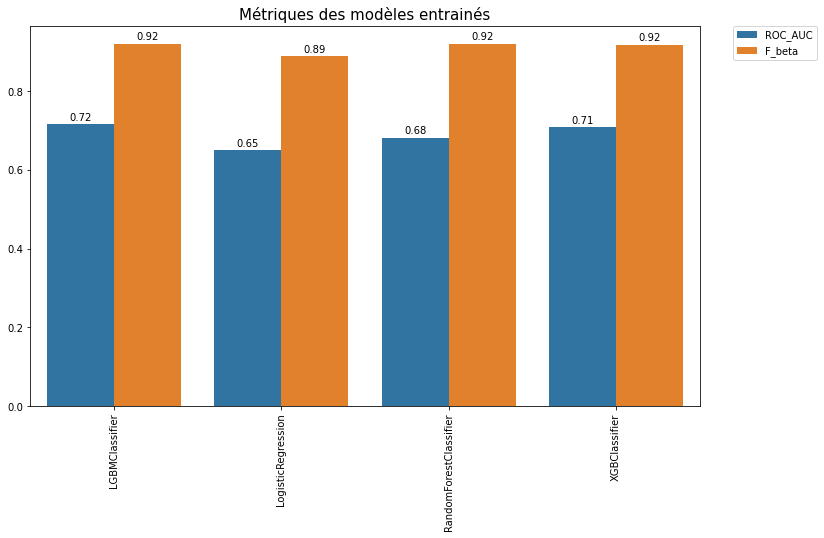

In [184]:
eval=final[['model','test_roc_auc','test_fbeta']]
eval_ag=eval.groupby("model").mean()
eval_ag['model']=eval_ag.index
eval_ag.rename(columns={'test_roc_auc': 'ROC_AUC',
                        'test_fbeta':'F_beta'},inplace=True)
stack=eval_ag.melt(id_vars=['model'])

fig, axes= plt.subplots(figsize=(12,7))
plt.title('Métriques des modèles entrainés', fontsize=15)
ax=sns.barplot(x='model', y= 'value',hue='variable',data=stack,ax=axes)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.01,
            "%.2f" % p.get_height(),
            ha="center") 
    
for tick in ax.get_xticklabels():
        tick.set_rotation(90)  

plt.xlabel("")
#plt.xticks(rotation=90)
plt.ylabel("")
plt.legend(bbox_to_anchor=(1.05,1),loc=2,  borderaxespad=0.)
plt.draw()

Bilan : les meilleures métriques sont obtenues via le modèle LGBMclassifier.

## <a id="62">Optimisation des hyperparamètres du modèle retenu</a>

In [196]:
#app_train
X=train_w_ech.copy()

In [197]:
y=X['TARGET']

In [198]:
X.drop(columns=['TARGET'],inplace=True)

In [199]:
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.20)
# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')
# Fit on the training data
X_test=imputer.fit_transform(X_test)
X_train=imputer.fit_transform(X_train)

In [193]:
pipe_lgb=Pipeline([('scaler',StandardScaler()),('lgb',LGBMClassifier())])
lgbm_param = {              
              'lgb__max_depth': range(3,10,2),  
              'lgb__num_leaves': [8,32,128,512], 
              'lgb__learning_rate': [0.1,0.03,0.07,0.001],
              'lgb__n_estimators': [100,200,300,400,500]            
              
              }

  
m_grid_cv = Pipeline([
    ('grid_search_ml', GridSearchCV(
                    model,
                    param_grid=lgbm_param,
                    cv=5,
                    error_score='raise',
                    scoring=('f1','roc_auc'),
                    refit='roc_auc',
                    return_train_score = True,
                    n_jobs = -1))])
    
    
fit_model = m_grid_cv.fit(X_train, y_train)
    
df_results = pd.DataFrame.from_dict(fit_model.named_steps['grid_search_ml'].cv_results_)
best_f1= np.mean(df_results[df_results.rank_test_f1== 1]['mean_test_f1'])
best_roc_auc= fit_model.named_steps['grid_search_ml'].best_score_
best_params= fit_model.named_steps['grid_search_ml'].best_params_
        
print("Meilleur score ROC_AUC : {}\nMeilleurs paramètres : {}"\
        .format(round(best_roc_auc,2),best_params))

Meilleur score ROC_AUC : 0.76
Meilleurs paramètres : {'lgb__learning_rate': 0.03, 'lgb__max_depth': 3, 'lgb__n_estimators': 300, 'lgb__num_leaves': 8}


## <a id="63">Evaluation du modèle sélectionné avec les meilleurs paramètres</a>

In [4]:
#app_train
X=train_w.copy()

In [5]:
y=X['TARGET']

In [6]:
X.drop(columns=['TARGET','SK_ID_CURR'],inplace=True)

In [7]:
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.20)

In [8]:
# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')
# Fit on the training data
X_test=imputer.fit_transform(X_test)
X_train=imputer.fit_transform(X_train)
scaler = StandardScaler()
X_test=scaler.fit_transform(X_test)
X_train=scaler.fit_transform(X_train)


In [350]:

lgbm=LGBMClassifier(learning_rate=0.03,max_depth= 3,n_estimators=300, num_leaves= 8)
kfold = KFold(n_splits=5, shuffle=True, random_state=123)
cv_results = cross_validate(lgbm, X_train, y_train,
                            cv=kfold, scoring=scoring)
model_fit = model.fit(X_train, y_train)
y_pred = model_fit.predict(X_test)
df = pd.DataFrame(cv_results)
df['model'] = name
df_fin=pd.DataFrame(df.mean(axis=0)).transpose()
df_fin

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc,test_fbeta
0,4.323063,0.076991,0.919923,0.894473,0.919923,0.883052,0.760441,0.919386


## <a id="64">Evaluation du modèle sélectionné avec traitement des classes dééquilibrées</a>

Trois méthodes de traitement du déséquilibre des classes seront testées : SMOTE, SMOTE et RandomUnderSampler et ADASYN

In [323]:

model = lgbm
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.28)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)

kfold = KFold(n_splits=5, shuffle=True, random_state=123)
cv_results = cross_validate(pipeline, X_train, y_train,
                            cv=kfold, scoring=scoring)
model_fit = model.fit(X_train, y_train)
y_pred = model_fit.predict(X_test)
df = pd.DataFrame(cv_results)
df['model'] = name
df_fin=pd.DataFrame(df.mean(axis=0)).transpose()
df_fin['meth']="SMOTE_RandomUnderSampler"

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc,test_fbeta
0,0.384903,0.012497,0.903429,0.873386,0.903429,0.884919,0.710812,0.90315


In [326]:

model = lgbm
steps = [('smote',SMOTE()), ('model', model)]
pipeline = Pipeline(steps=steps)

kfold = KFold(n_splits=5, shuffle=True, random_state=123)
cv_results = cross_validate(pipeline, X_train, y_train,
                            cv=kfold, scoring=scoring)
model_fit = model.fit(X_train, y_train)
y_pred = model_fit.predict(X_test)
df = pd.DataFrame(cv_results)
df['model'] = name
df_smote=pd.DataFrame(df.mean(axis=0)).transpose()
df_smote["meth"]="SMOTE"


In [327]:
from imblearn.over_sampling import ADASYN
model = lgbm
steps = [('adasyn',ADASYN()), ('model', model)]
pipeline = Pipeline(steps=steps)

kfold = KFold(n_splits=5, shuffle=True, random_state=123)
cv_results = cross_validate(pipeline, X_train, y_train,
                            cv=kfold, scoring=scoring)
model_fit = model.fit(X_train, y_train)
y_pred = model_fit.predict(X_test)
df = pd.DataFrame(cv_results)
df['model'] = name
df_adasyn=pd.DataFrame(df.mean(axis=0)).transpose()
df_adasyn["meth"]="ADASYN"

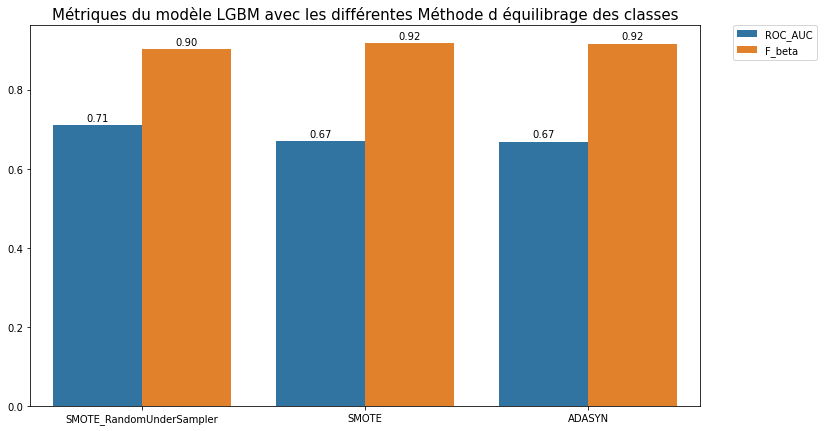

In [339]:
df=pd.concat([df_fin,df_smote,df_adasyn])
df=df[['meth','test_roc_auc','test_fbeta']]
df.rename(columns={'test_roc_auc': 'ROC_AUC',
                        'test_fbeta':'F_beta',
                          'meth':'Méthode'},inplace=True)
stack=df.melt(id_vars=['Méthode'])

fig, axes= plt.subplots(figsize=(12,7))
plt.title("Métriques du modèle LGBM avec les différentes Méthode d équilibrage des classes", fontsize=15)
ax=sns.barplot(x='Méthode', y= 'value',hue='variable',data=stack,ax=axes)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.01,
            "%.2f" % p.get_height(),
            ha="center") 
    


plt.xlabel("")
#plt.xticks(rotation=90)
plt.ylabel("")
plt.legend(bbox_to_anchor=(1.05,1),loc=2,  borderaxespad=0.)
plt.draw()

Les meilleures métrqiues du modèle sont obtenues en combinant les méthodes SMOTE et RandomUnderSample pour le traitement des classes déséquilibrées.

In [9]:
lgbm=LGBMClassifier(learning_rate=0.03,max_depth= 3,n_estimators=300, num_leaves= 8)
kfold = KFold(n_splits=5, shuffle=True, random_state=123)
scoring = {'accuracy': 'accuracy',
           'precision_weighted': 'precision_weighted',
           'recall_weighted': 'recall_weighted',
           'f1_weighted': 'f1_weighted',
           'roc_auc': 'roc_auc',
           'fbeta': make_scorer(fbeta_score, average='weighted', beta=3)       
           }
name='LGBMClassifier'

In [10]:

model = lgbm
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.28)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)

kfold = KFold(n_splits=5, shuffle=True, random_state=123)
cv_results = cross_validate(pipeline, X_train, y_train,
                            cv=kfold, scoring=scoring)
model_fit = model.fit(X_train, y_train)
y_pred = model_fit.predict(X_test)
df = pd.DataFrame(cv_results)
df['model'] = name
df_fin=pd.DataFrame(df.mean(axis=0)).transpose()

In [23]:
df_fin

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc,test_fbeta
0,2.72254,0.078106,0.909826,0.88227,0.909826,0.89115,0.762424,0.909536


In [11]:
model = lgbm
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.28)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)

kfold = KFold(n_splits=5, shuffle=True, random_state=123)
cv_results = cross_validate(pipeline, X_train, y_train,
                            cv=kfold, scoring=scoring)
model_fit = model.fit(X_train, y_train)
y_pred = model_fit.predict(X_test)

In [25]:
with open('model_lgbm.pkl', 'wb') as f:
    pickle.dump(model_fit, f)

## <a id="64">Interprétabilité</a>

### Interprétabilité globale

In [11]:
feats = [f for f in train_w.columns if f not in ['SK_ID_CURR','TARGET']]

In [354]:
explainer = shap.TreeExplainer(model_fit,X_train,feature_names = np.array(feats))
shap_values = explainer(X_test)

100%|===================| 245844/246008 [12:33<00:00]        

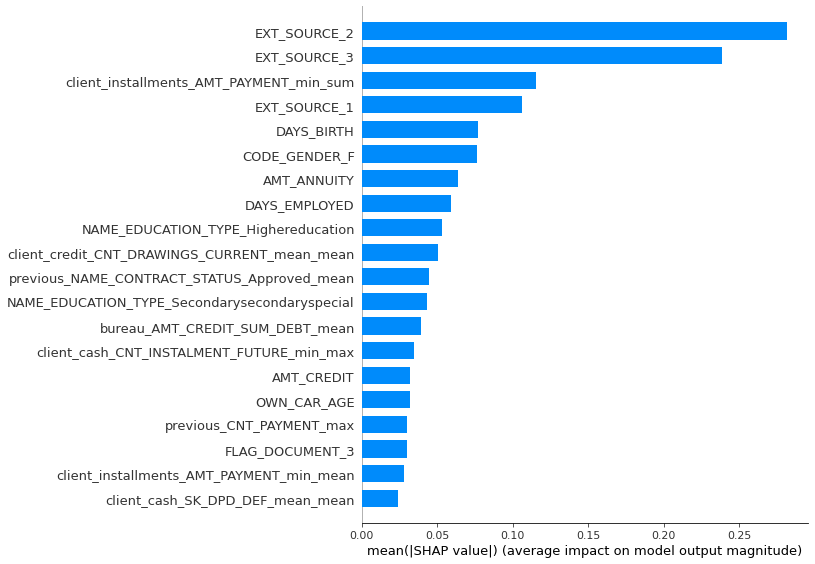

In [355]:
shap.summary_plot(shap_values, features=X, feature_names=X.columns, plot_type='bar')

In [363]:
# Sauvegarder les valeures de shap entrainé pour traitement ulterieure
with open('shap_values.pkl', 'wb') as f:
    pickle.dump(shap_values, f)

### Interprétabilité locale

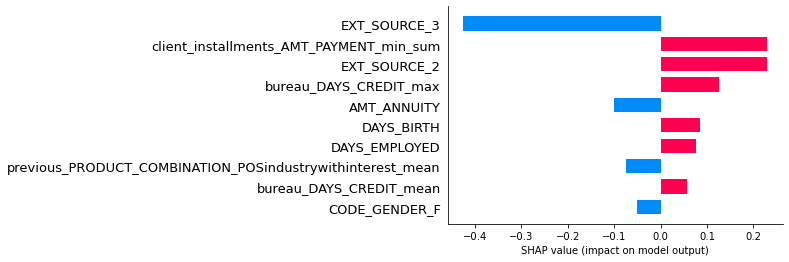

In [411]:
shap.bar_plot(explainer.shap_values(X_test[150]),
              feature_names=np.array(feats),
              max_display=10)

local

In [395]:
shap.initjs()
shap.plots.force(shap_values[200])